# Deep Learning in Medicine - Spring 2024
### BMSC-GA 4493, BMIN-GA 3007 
### Homework 2 - Convolutional Neural Networks





**Note:** If you need to write mathematical terms, you can type your answeres in a Markdown Cell via LaTex

See: <a href="https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook">here</a> if you have issues. To see basic LaTex notation see: <a href="https://en.wikibooks.org/wiki/LaTeX/Mathematics"> here </a>.

**Submission instruction**: Upload and Submit a zipped folder named netid_hw2 consisting of your final jupyter notebook and necessary files in <a href='https://brightspace.nyu.edu/d2l/home/158477'>Brightspace</a>. If you use code or script from web, please give a link to the code in your answers. Not providing the reference of the code used will reduce your points!!

**Submission deadline: Saturday March 23rd 2024 --> No Extensions!!**

## Topics & weightage -


1.   Convolutions (30)
2.   Network design (15)
3.   Literature review (19)
4.   Deep CNN design for disease classification (36)



## Question 1: Convolutions (Total 30 points)

### 1.1 Convolutions from **scratch** for image processing (11 points)

In [1]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import time


In [2]:
def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray');
    
def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray')

#### 1 point

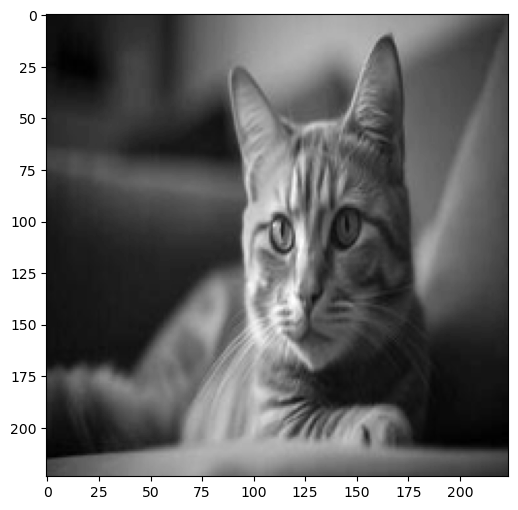

In [3]:
# TODO: Load any image of your choice and display (plot) the resized image (224*224) in grayscale using the plot_image function. 
# OR you can also utilize the sample image provided --> cat.png
# (None of these transformations are mandatory, but they make our job a bit easier, 
# as there’s only one color channel to apply convolution to)

image = Image.open('cat.png')
image = image.resize((224, 224))
image = ImageOps.grayscale(image) 
image = np.array(image)
plot_image(image)

In [4]:
# Defining Filters 
sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

blur = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125,  0.25,  0.125],
    [0.0625, 0.125, 0.0625]
])

outline = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

#### 1.5 points

In [5]:
def calculate_target_size(img_size: int, kernel_size: int) -> int:
    '''
    Helper function to calculate the image size after applying the convolution
    Basically calculates how many windows of the filter size you can fit to an image (assuming square image)
    Applying a convolution to an image will make it smaller (assuming no padding). 
    The filter size determined how smaller the image will be after convolving.

    Args:
    img_size: size of one dimension of the input image (assuming its a square image)
    kernel_size: size of one dimension of the kernel (a square kernel)

    Returns:
    num_pixels: number of pixels in the resultant output image

    '''
    #TODO: Write a generic function that inputs an image size & kernel size to calculate the final size of the output
    num_windows = img_size - (kernel_size - 1)
    num_pixels = num_windows*num_windows
    
    return num_pixels

#### 3 points

In [6]:
def convolve(img: np.array, kernel: np.array) -> np.array:
    '''
    The convolve() function calculates the target size and creates 
    a matrix of zeros with that shape, iterates over all rows and 
    columns of the image matrix, subsets it, and applies the convolution.

    Args:
    img: the input image as a numpy array
    kernel: kernel as a numpy array

    Returns:
    convolved_img: output image after sliding the kernel over the input image  
    '''
    #TODO: implement the convolve function 
    #Iterate over all rows and columns of the input image matrix.
    #Subset the image based on the kernel size at each position and apply the convolution operation.
    
    target_size = int(np.sqrt(calculate_target_size(img.shape[0], kernel.shape[0]))) #Calculate size
    convolved_img = np.zeros([target_size, target_size]) #Initialize convolved image
    
    #Iterate over all rows and columns of the input
    for i in range(target_size):
        for j in range(target_size):
            subset = img[i:i+kernel.shape[0], j:j+kernel.shape[1]]
            convolved_img[i, j] = np.sum(subset * kernel)
    
    return convolved_img

#### 0.5 point

Sharpened Image Array: [[15. 15. 15. ... 64. 53. 56.]
 [14. 14. 14. ... 58. 43. 56.]
 [17. 17. 17. ... 50. 45. 52.]
 ...
 [66. 65. 73. ... 57. 50. 50.]
 [52. 58. 55. ... 48. 49. 49.]
 [75. 68. 73. ... 47. 41. 41.]]
Sharpened Image Shape: (222, 222)


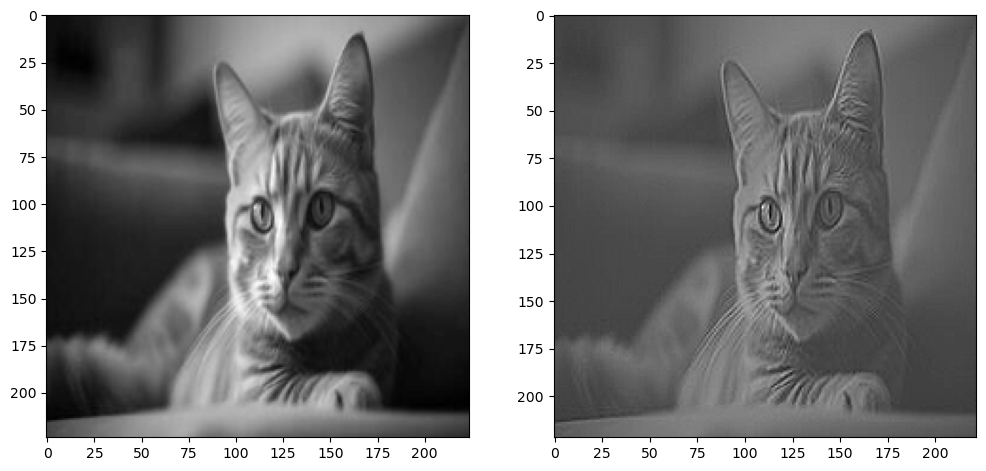

In [7]:
#TODO: use the convolved function & the sharpen filter to obtain a sharpened image of your original input 
#TODO: print the sharpened image array named img_sharpened
#TODO: Use the plot_two_images function to plot the original image and sharpened image side by side

img_sharpened = convolve(image, sharpen)

print('Sharpened Image Array:',img_sharpened)
print('Sharpened Image Shape:',img_sharpened.shape)

plot_two_images(image, img_sharpened)


#### 0.5 point

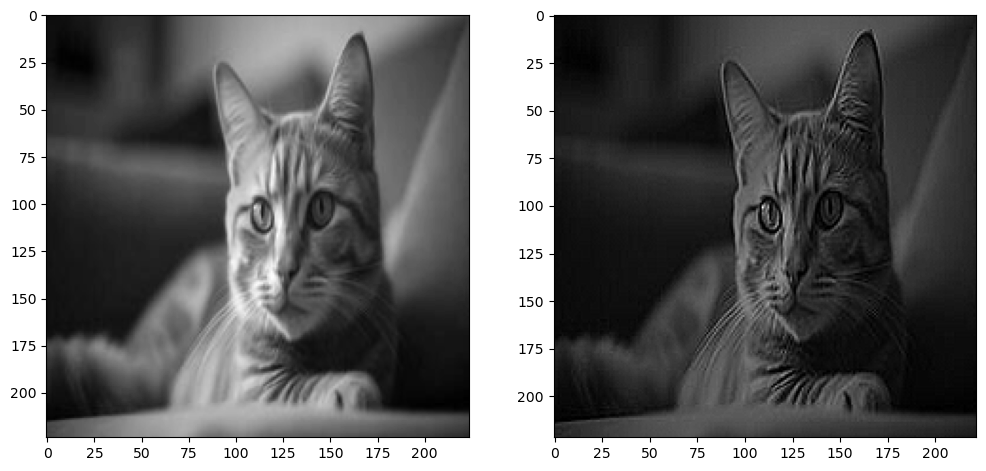

In [8]:
#TODOThe sharpened image is a little dull. Thats because some values in the sharpened image 
# are less than zero. Write a function that uses 0 as a threshold and converts all pixel 
# values less than zero to zero.

def negative_to_zero(img: np.array) -> np.array:
    '''
    Args:
    img: numpy array of image

    Returns:
    img: all values less than zero are assigned zero in original image
    '''
    img[img<0]=0
    return img

#TODO: Use the plot_two_images function to plot the original image and negative_to_zero sharpened image side by side
img_neg_to_zero_sharpened = negative_to_zero(img_sharpened)


plot_two_images(image, img_neg_to_zero_sharpened)


#### 1 point

Blurred Image Array: [[15.     15.     15.     ... 59.0625 56.875  57.0625]
 [15.25   15.25   15.25   ... 55.625  54.     54.9375]
 [15.75   15.75   15.75   ... 52.375  51.4375 53.1875]
 ...
 [61.25   63.5625 65.625  ... 52.25   51.125  49.875 ]
 [61.75   63.3125 64.8125 ... 49.     47.875  46.625 ]
 [62.6875 64.     65.5    ... 45.875  44.6875 43.4375]]
Blured Image Shape: (222, 222)


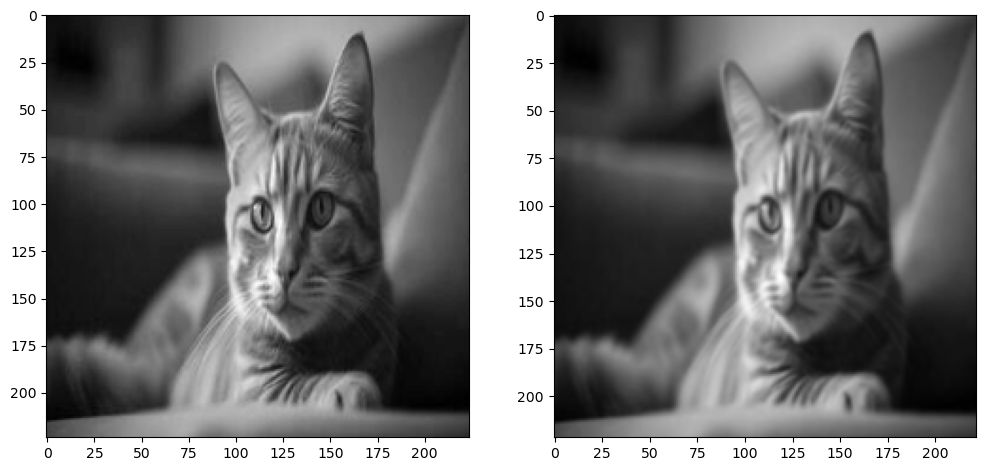

In [9]:
#TODO: use the convolved function & the blur filter to obtain a sharpened image of your original input 
#TODO: print the blurred image array named img_blurred
#TODO: Use the plot_two_images function to plot the original image and blurred image side by side
img_blurred = convolve(image, blur)
print('Blurred Image Array:',img_blurred)
print('Blured Image Shape:',img_blurred.shape)
plot_two_images(image, img_blurred)

Outlined Image Array: [[  0.   0.   0. ...  11. -11.   0.]
 [ -3.  -3.  -3. ...   4. -23.   0.]
 [  3.   3.   3. ...  -4. -18.  -2.]
 ...
 [  8.   6.  16. ...   8.  -1.   2.]
 [-20. -17. -21. ...   1.   1.   4.]
 [ 27.  13.  18. ...   1.  -8.  -5.]]
Outlined Image Shape: (222, 222)


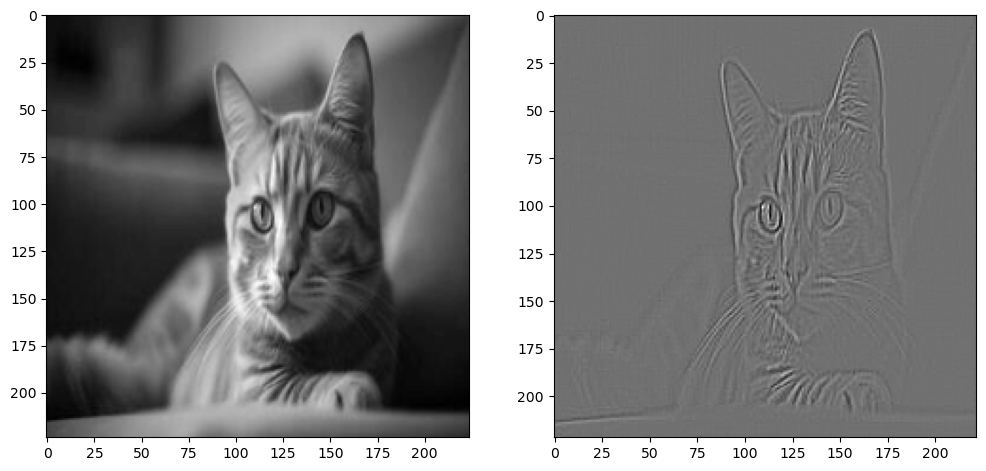

In [10]:
#TODO: use the convolved function & the outline filter to obtain a outlined image of your original input 
#TODO: print the outlined image array named img_outlined
#TODO: Use the plot_two_images function to plot the outlined image and original image side by side
img_outlined = convolve(image, outline)

print('Outlined Image Array:',img_outlined)
print('Outlined Image Shape:',img_outlined.shape)

plot_two_images(image, img_outlined)

#### Convolutions with padding:

Padding is essentially a “black” border around the image. It’s black because the values are zeros, and zeros represent the color black. The black borders don’t have any side effects on the calculations, as it’s just a multiplication with zero.

#### 0.5 point

In [11]:
def get_padding_width_per_side(kernel_size: int) -> int:
    '''
    Function that returns the number of pixels we need to 
    pad the image with on a single side, depending on the kernel size

    Args:
    kernel_size: filter size 

    Returns:
    padding_width 
    '''
    #TODO: Simple integer division by 2
    padding_width = kernel_size // 2

    return padding_width

In [12]:
#--> uncomment this section
pad_3x3 = get_padding_width_per_side(3)
pad_5x5 = get_padding_width_per_side(5)

#### 1.5 points

In [13]:
def add_padding_to_image(img: np.array, padding_width: int) -> np.array:
    '''
    Function that adds padding to the image. 
    First, the function declares a matrix of zeros with a shape of image.shape + padding * 2. 
    The function then indexes the matrix so the padding is ignored and changes the zeros with the actual image values.

    Args:
      img: Original image numpy array
      padding_width: obtained in the get padding function earlier

    Returns:
      img_with_padding: padded image
    '''
#     #TODO: take your image and a padding width as input and return the image with the padding added
    img_with_padding = np.zeros((img.shape[0] + 2*padding_width, img.shape[1] + 2*padding_width))  #Initialize image with padding
    
    img_with_padding[padding_width:padding_width+img.shape[0], padding_width:padding_width+img.shape[1]] = img #Put image in center
    
    
    return img_with_padding

#### Q: In the above function add_padding_to_image, explore the possible reason for the multiplication of padding_width by 2 in step 1 (1 point). 

Since the padding is only for one side of the image, we would need to multiply it by 2 so that it covers both sides of the image.

#### 0.5 point

(226, 226)


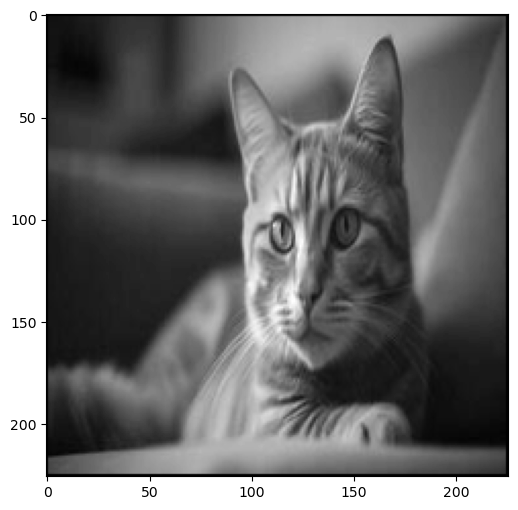

In [14]:
#TODO: Use the add_padding_to_image function to obtain the padded image (kernel size of 3)
padding_width = get_padding_width_per_side(3)
img_with_padding_3x3 = add_padding_to_image(image,padding_width)

# --> UNCOMMENT two lines below
print(img_with_padding_3x3.shape)
plot_image(img_with_padding_3x3)

(228, 228)


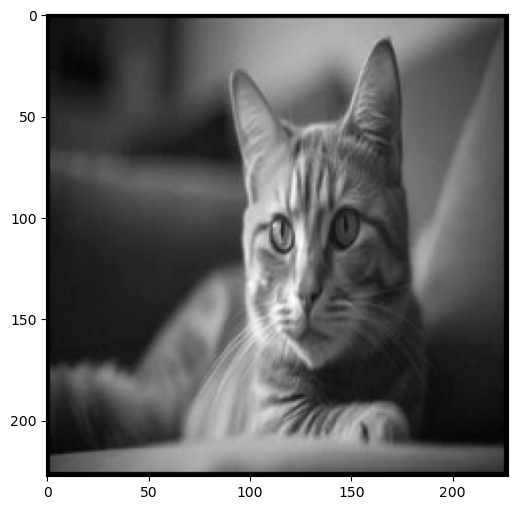

In [15]:
#TODO: Use the add_padding_to_image function to obtain the padded image (kernel size of 5)
padding_width = get_padding_width_per_side(5)
img_with_padding_5x5 = add_padding_to_image(image,padding_width)

# --> UNCOMMENT two lines below
print(img_with_padding_5x5.shape)
plot_image(img_with_padding_5x5)

#### 1 point

Array of padded sharpended image: [[ 45.  30.  30. ... 113. 120. 182.]
 [ 30.  15.  15. ...  53.  56. 121.]
 [ 29.  14.  14. ...  43.  56. 115.]
 ...
 [112.  52.  58. ...  49.  49.  87.]
 [137.  75.  68. ...  41.  41.  82.]
 [170. 118. 123. ...  81.  80. 117.]]
Shape of padded sharpended image: (224, 224)


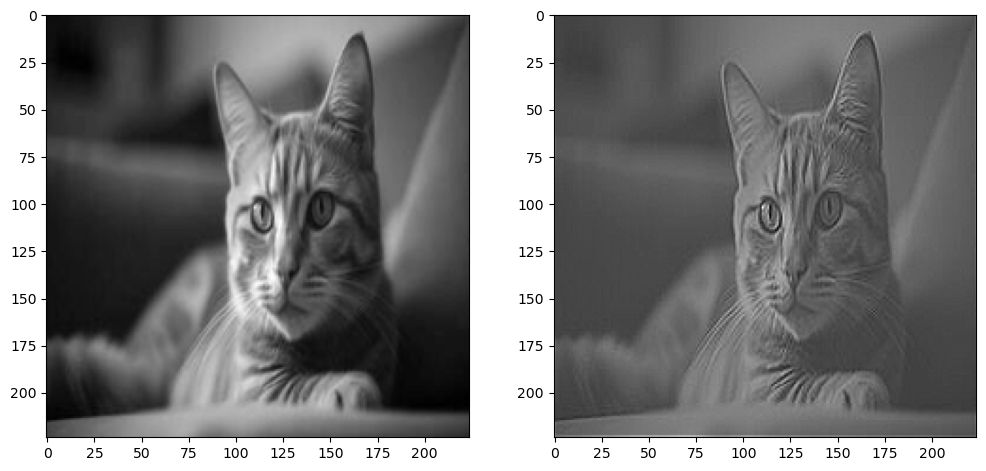

In [16]:
#TODO: use the convolved function & the sharpen filter to obtain a sharpened image of your padded image obtained from add_padding_to_image function 
#TODO: print the shape of the obtain sharpened image (obtained after padding)
#TODO: plot the original image and the sharpened image (obtained after padding) side by side using the plot_two_images function

img_padded_sharpened = convolve(img_with_padding_3x3, sharpen)
print('Array of padded sharpended image:', img_padded_sharpened)
print('Shape of padded sharpended image:', img_padded_sharpened.shape)
plot_two_images(image, img_padded_sharpened)

### 1.2: Convolutional Layers (4 points)

We have a 3x5x5 image (3 channels) and three 3x3x3 convolution kernels as pictured. Bias term for each feature map is also provided. For the questions below, please provide the feature/activation maps requested, please provide the python code that you used to calculate the maps

Hint: An image tensor should be [batch size, channels, height, weight], kernels/filters tensor should be [number of filters (output channels), filter_size_1 (input channels), filter_size_2, filter_size_3].

<img src="https://github.com/nyumc-dl/BMSC-GA-4493-Spring2022/blob/main/Homework2/HW2_picture1.png?raw=1">

### 1.2 What will be the dimension of the feature maps after we forward propogate the image using the given convolution kernels for the following (a) - (d)

In [17]:
x = np.load('q1_input.npy')
w = np.load('q1_Filters.npy')
b = np.load('q1_biases.npy')

In [19]:
#Adding stride to convolution function
def convolve_with_stride(img: np.array, kernel: np.array, bias:np.array, stride: int) -> np.array:
    num_images = img.shape[0]
    target_length = (img.shape[1] - kernel.shape[1]) // stride + 1
    convolved_imgs = np.zeros([num_images, target_length, target_length])

    for n in range(num_images):
        for i in range(0, img.shape[1] - kernel.shape[0] + 1, stride):
            for j in range(0, img.shape[2] - kernel.shape[1] + 1, stride):
                subset = img[n, i:i+kernel.shape[0], j:j+kernel.shape[1]]
                convolved_imgs[n, i//stride, j//stride] = np.sum(subset * kernel[n])
                convolved_imgs[n,:,:] = convolved_imgs[n,:,:]
    convolved_img = np.sum(convolved_imgs, axis=0) 

    for i, val in enumerate(convolved_img):
        convolved_img[i] += bias
    
    return convolved_img

#### 1.2.a) (1 point)
__stride=1, without zero padding?__

3x3x3

In [20]:
#See above convolve_with_stride function 
stride = 1
target_length = (x.shape[1] - w.shape[1]) // stride + 1
feature_map = np.zeros([3, target_length, target_length])

for i, kernel in enumerate(w):
    feature_map[i] = convolve_with_stride(x, kernel, b[i], stride)
    
print('Feature Map:\n', feature_map)
print('\nFeature Map Shape:\n', feature_map.shape)


Feature Map:
 [[[-13.   5. -12.]
  [ -8.  -2. -24.]
  [ 10.  -8. -11.]]

 [[ 16.  17.  23.]
  [  5.  37. -13.]
  [ 22.  30.  32.]]

 [[ 16.   3. -15.]
  [  3.   1.  -8.]
  [  0.  -1. -14.]]]

Feature Map Shape:
 (3, 3, 3)


#### 1.2.b) (1 point) 
__stride=2, padding = 1?__

3x3x3

In [21]:
#See above convolve_with_stride function 
stride = 2
padding_width = 1

x_with_padding = np.zeros((3, x.shape[1] + 2 * padding_width, x.shape[2] + 2 * padding_width))  #Initialize image with padding

for i,channel in enumerate(x):
    x_with_padding[i, padding_width:padding_width+x.shape[1], padding_width:padding_width+x.shape[2]] = x[i] #Put image in center
    
    
target_length = (x_with_padding.shape[1] - w.shape[1]) // stride + 1
feature_map = np.zeros([3, target_length, target_length])

for i, kernel in enumerate(w):
    feature_map[i] = convolve_with_stride(x_with_padding, kernel, b[i], stride)
    
print('Feature Map:\n', feature_map)
print('\nFeature Map Shape:\n', feature_map.shape)


Feature Map:
 [[[  3. -25. -24.]
  [ 22.  -2. -12.]
  [  9. -10.   0.]]

 [[  6.  31.  28.]
  [ 12.  37.  32.]
  [  8.  23.  -2.]]

 [[-21.   0.  12.]
  [-20.   1. -15.]
  [  4.   6.  -8.]]]

Feature Map Shape:
 (3, 3, 3)


#### 1.2.c) (1 point)
__stride=3, padding = 2?__

3x3x3

In [22]:
#See above convolve_with_stride function 
stride = 3
padding_width = 2

x_with_padding = np.zeros((3, x.shape[1] + 2 * padding_width, x.shape[2] + 2 * padding_width))  #Initialize image with padding

for i,channel in enumerate(x):
    x_with_padding[i, padding_width:padding_width+x.shape[1], padding_width:padding_width+x.shape[2]] = x[i] #Put image in center
    
    
target_length = (x_with_padding.shape[1] - w.shape[1]) // stride + 1
feature_map = np.zeros([3, target_length, target_length])

for i, kernel in enumerate(w):
    feature_map[i] = convolve_with_stride(x_with_padding, kernel, b[i], stride)
    
print('Feature Map:\n', feature_map)
print('\nFeature Map Shape:\n', feature_map.shape)


Feature Map:
 [[[  9.   2.  -8.]
  [  9.  -2.  -1.]
  [  3.   6.   2.]]

 [[ -7.  -7.  12.]
  [  4.  37.  16.]
  [  3.  -2.   5.]]

 [[-12.  -8.   5.]
  [ -7.   1.  12.]
  [ -4. -15.  -5.]]]

Feature Map Shape:
 (3, 3, 3)


#### 1.2.d) (1 point) 
__A dilated convolution with stride=1, dilation rate=2 and padding=0?__

3x1x1

In [23]:
def convolve_with_stride_and_dilation(img: np.array, kernel: np.array, bias: np.array, stride: int, dilation: int) -> np.array:
    num_images = img.shape[0]
    target_length = (img.shape[1] - (kernel.shape[1] - 1) * dilation - 1) // stride + 1
    convolved_imgs = np.zeros([num_images, target_length, target_length])

    for n in range(num_images):
        for i in range(0, img.shape[1] - (kernel.shape[1] - 1) * dilation, stride):
            for j in range(0, img.shape[2] - (kernel.shape[2] - 1) * dilation, stride):
                subset = img[n, i:i + kernel.shape[1] * dilation:dilation, j:j + kernel.shape[2] * dilation:dilation]
                convolved_imgs[n, i // stride, j // stride] = np.sum(subset * kernel[n])
    
    convolved_img = np.sum(convolved_imgs, axis=0)

    for i, val in enumerate(convolved_img):
        convolved_img[i] += bias
        
    return convolved_img

In [24]:
#See above convolve_with_stride_and_dilation function 
stride = 1
dilation = 2
    
target_length = (x.shape[1] - (kernel.shape[1] - 1) * dilation - 1) // stride + 1
feature_map = np.zeros([3, target_length, target_length])

for i, kernel in enumerate(w):
    feature_map[i] = convolve_with_stride_and_dilation(x, kernel,  b[i], stride, dilation)
    
print('Feature Map:\n', feature_map)
print('\nFeature Map Shape:\n', feature_map.shape)


Feature Map:
 [[[-16.]]

 [[ 25.]]

 [[  1.]]]

Feature Map Shape:
 (3, 1, 1)


__1.3 Feature Dimensions of Convolutional Neural Network (4*0.5 points)__

In this problem, we compute output feature shape of convolutional layers and pooling layers, which are building blocks of CNN. Let’s assume that input feature shape is W × H × C, where W is the width, H is the height and C is the number of channels of input feature. 




#### 1.3 (a) A convolutional layer has 4 hyperparameters: the filter size(K), the padding size (P), the stride step size (S) and the number of filters (F). How many weights and biases are in this convolutional layer? And what is the shape of output feature that this convolutional layer produces? 


Answer) 

The total number of weights would be equal to the combined size of the filters.  Since the filter is square with C channels this would be K x K x C.  Since there are F filters total, the total number of weights is F x K x K x C.

Since there is one bias term per filter the total number of bias terms is F.

For the output size:

$W_{out} = [(W_{in}−K+2P)/S]+1$ 

$H_{out} = [(H_{in}−K+2P)/S]+1 $

$C_{out} = F $







#### 1.3 (b) A pooling layer has 2 hyperparameters: the stride step size(S) and the filter size (K). What is the output feature shape that this pooling layer produces? 

Answer) 

For each dimension we would have:

$W_{out}= [(W_{in}−K)/S]+1 $

$H_{out}= [(H_{in}−K)/S]+1 $

$C_{out}= C_{in}$




#### 1.3 (c) Let’s assume that we have the CNN model which consists of L successive convolutional layers and the filter size is K and the stride step size is 1 for every convolutional layer. Then what is the receptive field size? 

Answer) 

The receptive field is the portion of the feature map that contributes to a feature in the output of each layer. Using recursion with a stride of 1, we can see that the size would be $\sum_{i=1}^L (K-1) +1$.  Therefore:

Receptive Field Size = $L(K-1) + 1$










#### 1.3 (d) Consider a downsampling layer (e.g. pooling layer and strided convolution layer). In this problem, we investigate pros and cons of downsampling layer. This layer reduces the output feature resolution and this implies that the output features loose the certain amount of spatial information. Therefore when we design CNN, we usually increase the channel length to compensate this loss. For example, if we apply the max pooling layer with kernel size of 2 and stride size of 2, we increase the output feature size by a factor of 2. If we apply this max pooling layer, how much the receptive field increases? Explain the advantage of decreasing the output feature resolution with the perspective of reducing the amount of computation.

Answer)

If we apply the max pooling layer the receptive field will also increase by a factor of 2.  The advantage of decreasing the output feature resolution is that it makes training for computationally efficient.  This can can decrease overall training time for the model.

### 1.4) (6 points)
Use the pytorch package to calculate feature/activation maps. Write a code which takes 3x5x5 image and performs a 2D convolution operation (with stride = 1 and zero padding) using 3x3x3 filters provided on the picture. After convolution layer use leaky ReLU activation function (with negative slope 0.01) and Max-Pooling operation with required parameters to finally obtain output of dimension 3x1x1. Provide the code, feature maps obtained from convolution operation, activation maps, and feature maps after Max-Pooling operation.

**Hint:** You can refer to [AdaptiveMaxPool2d](https://pytorch.org/docs/stable/nn.html#adaptivemaxpool2d) to get desired dimension output from Pooling layer.

In [25]:
# starter code to load image:x, kernel weights:w and bias:b

x = np.load('q1_input.npy')
w = np.load('q1_Filters.npy')
b = np.load('q1_biases.npy')

#Convert to tensors:
x = torch.tensor(x).float()
w = torch.tensor(w).float()
b = torch.tensor(b).float()


class ConvNet(nn.Module):
    def __init__(self, kernel, biases):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 3, kernel_size=3, stride=1, padding=1) #Convolutional layer
        self.conv1.weight = nn.Parameter(kernel) #Kernel
        self.conv1.bias = nn.Parameter(biases) #Biases
        self.leaky_relu = nn.LeakyReLU(0.01) #Leaky ReLU activation function
        self.max_pool = nn.AdaptiveMaxPool2d((1))
        
    def forward(self, x):
        x = self.conv1(x)
        print("Feature maps after convolution operation:\n",x)
        
        x = self.leaky_relu(x)
        print("\nFeature maps after activation function:\n",x)

        x = self.max_pool(x)
        print("\nFeature maps after max pooling:\n",x)

        return x

#Initialize Model:
model = ConvNet(w, b)

#Forward Pass:
output = model(x)


Feature maps after convolution operation:
 tensor([[[  3.,  -6., -25.,  -1., -24.],
         [ -6., -13.,   5., -12., -15.],
         [ 22.,  -8.,  -2., -24., -12.],
         [  2.,  10.,  -8., -11.,  -5.],
         [  9.,   0., -10.,  17.,   0.]],

        [[  6.,  27.,  31.,  16.,  28.],
         [ 12.,  16.,  17.,  23.,  16.],
         [ 12.,   5.,  37., -13.,  32.],
         [ 18.,  22.,  30.,  32.,  14.],
         [  8.,  -9.,  23.,  -3.,  -2.]],

        [[-21.,  -7.,   0.,  -8.,  12.],
         [  0.,  16.,   3., -15., -14.],
         [-20.,   3.,   1.,  -8., -15.],
         [-27.,   0.,  -1., -14.,   1.],
         [  4.,  -3.,   6.,   2.,  -8.]]], grad_fn=<SqueezeBackward1>)

Feature maps after activation function:
 tensor([[[ 3.0000e+00, -6.0000e-02, -2.5000e-01, -1.0000e-02, -2.4000e-01],
         [-6.0000e-02, -1.3000e-01,  5.0000e+00, -1.2000e-01, -1.5000e-01],
         [ 2.2000e+01, -8.0000e-02, -2.0000e-02, -2.4000e-01, -1.2000e-01],
         [ 2.0000e+00,  1.0000e+01, -8

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


### 1.5) (7 points)
Use the pytorch package to calculate feature/activation maps of a residual unit as depicted in Figure 2 of https://arxiv.org/pdf/1512.03385.pdf as well as on the figure above.


<img src="https://github.com/nyumc-dl/BMSC-GA-4493-Spring2022/blob/main/Homework2/HW2_picture2.png?raw=1" width="150">

__Write a code which takes 3x5x5 input image and performs two 2D convolution operations using the filters provided on the figure. Please use the three 3x3x3 filters for the two Convolution layers. You need to set a suitable padding size for the convolution operations. After the convolution layers and after the residual addition use ReLU activation function. Provide the code and feature maps obtained from each convolution operation, activation maps, and the last activation map obtained from the residual unit.__

In [26]:
x = np.load('q1_input.npy')
w = np.load('q1_Filters.npy')
b = np.load('q1_biases.npy')

#Convert to tensors:
x = torch.tensor(x).float()
w = torch.tensor(w).float()
b = torch.tensor(b).float()


class ConvNet2(nn.Module):
    def __init__(self, kernel, biases):
        super(ConvNet2, self).__init__()
        padding = 1
        self.conv1 = nn.Conv2d(3, 3, kernel_size=3, stride=1, padding=padding) #Convolutional layer
        self.conv1.weight = nn.Parameter(kernel) #Kernel
        self.conv1.bias = nn.Parameter(biases) #Biases
        self.conv2 = nn.Conv2d(3, 3, kernel_size=3, stride=1, padding=padding) #Convolutional layer 2
        self.conv2.weight = nn.Parameter(kernel) #Kernel
        self.conv2.bias = nn.Parameter(biases) #Biases
        self.relu = nn.ReLU() #ReLU activation function
        
    def forward(self, x):
        x1 = self.conv1(x)
        print("Feature maps after first convolution operation:\n",x1)
        x1 = self.relu(x1)
        print("\nFeature maps after first activation function:\n",x1)
        x2 = self.conv2(x1)
        print("Feature maps after second convolution operation:\n",x2)
        x3 = x + x2
        print("\nFeature maps after residual addition:\n",x3)
        x3 = self.relu(x3)
        print("\nFeature maps after second activation function:\n",x3)

        return x

#Initialize Model:
model2 = ConvNet2(w, b)

#Forward Pass:
output = model2(x)

Feature maps after first convolution operation:
 tensor([[[  3.,  -6., -25.,  -1., -24.],
         [ -6., -13.,   5., -12., -15.],
         [ 22.,  -8.,  -2., -24., -12.],
         [  2.,  10.,  -8., -11.,  -5.],
         [  9.,   0., -10.,  17.,   0.]],

        [[  6.,  27.,  31.,  16.,  28.],
         [ 12.,  16.,  17.,  23.,  16.],
         [ 12.,   5.,  37., -13.,  32.],
         [ 18.,  22.,  30.,  32.,  14.],
         [  8.,  -9.,  23.,  -3.,  -2.]],

        [[-21.,  -7.,   0.,  -8.,  12.],
         [  0.,  16.,   3., -15., -14.],
         [-20.,   3.,   1.,  -8., -15.],
         [-27.,   0.,  -1., -14.,   1.],
         [  4.,  -3.,   6.,   2.,  -8.]]], grad_fn=<SqueezeBackward1>)

Feature maps after first activation function:
 tensor([[[ 3.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  5.,  0.,  0.],
         [22.,  0.,  0.,  0.,  0.],
         [ 2., 10.,  0.,  0.,  0.],
         [ 9.,  0.,  0., 17.,  0.]],

        [[ 6., 27., 31., 16., 28.],
         [12., 16., 17., 23., 16.],


### 1.6 (2 points)
__Describe the key design paramters of inception v3 (https://arxiv.org/pdf/1512.00567.pdf) and explain how it avoids overfitting of data.__ 

There are four main general design principles discussed at the beginning of the inception v3 paper.  The first is avoiding bottlenecks early in the network and instead have the representation slowly shrinking throughout the network.  This assists in having as much information as possible throughout the model to allow for better training and having more robust data throughout the model can help prevent overfitting. Second, the paper discusses the importance of high dimensional representations.  Having an increased number of feature maps helps the model disentangle features, allowing for more independent features that can generalize, which can help to avoid overfitting and can be trained more efficiently. Third, the paper stresses the importance of dimensionality reduction before spatial aggregation.  The authors state that reducing the dimensions of the input before spatial aggregation does not result in much lost information.  This can help to avoid overfitting by reducing the overall noise from the training data that the model could potentially try to replicate. Finally, the paper discusses balancing width and depth of the model.  Increasing both the width and the depth can lead to an overall better model (however could be prone to overfit if too large). Doing so in parallel helps make it more computationally efficient to train and allows the model's capacity to grow in a controlled manner, which can help prevent overfitting by limiting its ability to memorize noise.

Using these design principles, the paper discusses their application in inception v3 through the use of factorizing convolutions, auxilary classifiers, efficient grid size reduction, and label smoothing. Factorizing convolutions allows inception to reduce the total number of parameters by the sharing of weights between adjacent tiles. This can help avoid overfitting since the number of parameters are reduced. The incorporation of auxilary classifiers helps to stabilize the gradient, and we could also see that they act like a regularizer when incorporating batch normalization, which helps to prevent overfitting.  When discussing efficient grid size reduction, inception parallelizes the pooling and convolution layers to help overall computational efficiency.  Label smoothing is the main design parameter that prevents overfitting.  The mechanism encourages the model to be less confident by replacing label distribution with a mixture of its true distribution and a uniform prior.  This overall smooths the labels and provides additional regularization in the model, preventing overfitting and increasing generalization.


# Question 2: Network design parameters for disease classification (Total 15 points)

Disease classification is a common problem in medicine. There are many ways to solve this problem. Goal of this question is to make sure that you have a clear picture in your mind about possible techniques that you can use in such a classification task.

Assume that we have a 10K images in a dataset of computed tomography (CTs). For each image, the dimension is 16x256x256 and we have the label for each image. The label of each image defines which class the image belongs (lets assume we have 4 different disease classes in total). You will describe your approach of classifying the disease for the techniques below. Make sure you do not forget the bias term. You can either design your proposed network by explaining it explicitely or you can provide the pytorch code which designs the network for questions 2.1.a, 2.2.a, and 2.3.a


In [18]:
# starter code
import torch
import torch.nn as nn

# you can generate a random image tensor for batch_size 8
x = torch.Tensor(8,1,16,256,256).normal_().type(torch.FloatTensor)

### 2.1.a) (2 points)
__Design a multi layer perceptron (MLP) with a two hidden layer which takes an image as input (by reshaping it to a vector: lets call this a vectorized image). Our network has to first map the vectorized images to a vector of 512, then to 256 in the second hidden layer and then to 128 in the third hidden layer and finally feeds this vector to a fully connected layer to get the probability of 5 tissue classes.__ 

In [19]:
class MLP(nn.Module):
    def __init__(self, c, h, w):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(c*h*w, 512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,128)
        self.fc4 = nn.Linear(128, 5)
        
    def forward(self, x):
        print('Input shape:', x.shape)
        x = x.view(x.size(0), -1) #Flatten
        print('Shape after flatten:', x.shape)
        x = torch.relu(self.fc1(x))
        print('Shape after first layer:', x.shape)
        x = torch.relu(self.fc2(x))
        print('Shape after second layer:', x.shape)
        x = torch.relu(self.fc3(x))
        print('Shape after third layer:', x.shape)
        x = torch.softmax(self.fc4(x), dim=1) #Use softmax in final layer for probabilities
        print('Shape after final layer (output):', x.shape)
        return x



### 2.1.b) (2 points)
__Clearly mention the sizes for your input and output at each layer until you get final output vector with 5 tissue classes in 64x128x128 voxels(volumetric pixel)__

In [9]:
#Using input (8,1,16,256,256):
model_mlp = MLP(c=16, h=256, w=256)
output = model_mlp(x)
print(output)

Input shape: torch.Size([8, 1, 16, 256, 256])
Shape after flatten: torch.Size([8, 1048576])
Shape after first layer: torch.Size([8, 512])
Shape after second layer: torch.Size([8, 256])
Shape after third layer: torch.Size([8, 128])
Shape after final layer (output): torch.Size([8, 5])
tensor([[0.1914, 0.2049, 0.1928, 0.2112, 0.1996],
        [0.2031, 0.2005, 0.1998, 0.2006, 0.1960],
        [0.1994, 0.2074, 0.1959, 0.2013, 0.1959],
        [0.1954, 0.2110, 0.1882, 0.2073, 0.1980],
        [0.1967, 0.1994, 0.1974, 0.2072, 0.1994],
        [0.1957, 0.2018, 0.1945, 0.2029, 0.2051],
        [0.1969, 0.2068, 0.1979, 0.1995, 0.1989],
        [0.1954, 0.2016, 0.2025, 0.2031, 0.1974]], grad_fn=<SoftmaxBackward0>)


In [10]:
#Using input (8,1,64,128, 128):
x = torch.Tensor(8,1,64,128,128).normal_().type(torch.FloatTensor)

model_mlp = MLP(c=64, h=128, w=128)
output = model_mlp(x)
print(output)

Input shape: torch.Size([8, 1, 64, 128, 128])
Shape after flatten: torch.Size([8, 1048576])
Shape after first layer: torch.Size([8, 512])
Shape after second layer: torch.Size([8, 256])
Shape after third layer: torch.Size([8, 128])
Shape after final layer (output): torch.Size([8, 5])
tensor([[0.2011, 0.2017, 0.1837, 0.1991, 0.2143],
        [0.1974, 0.2038, 0.1771, 0.1988, 0.2229],
        [0.2097, 0.2018, 0.1886, 0.1919, 0.2079],
        [0.1972, 0.2068, 0.1847, 0.1952, 0.2162],
        [0.2007, 0.2009, 0.1905, 0.1968, 0.2111],
        [0.1972, 0.2049, 0.1851, 0.1988, 0.2139],
        [0.1999, 0.1961, 0.1875, 0.2085, 0.2080],
        [0.2021, 0.1976, 0.1847, 0.2025, 0.2132]], grad_fn=<SoftmaxBackward0>)


##### 

### 2.1.c) (1 points)
__How many parameters you need to fit for your design? How does adding another hidden layer (64 neurons) will effect the number of parameters to use?__

In [20]:
#Add hidden layer to see how number of parameters changes:

class MLP2(nn.Module):
    def __init__(self, c, h, w):
        super(MLP2, self).__init__()
        self.fc1 = nn.Linear(c*h*w, 512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 5) #Additional layer to see how many params 

        
    def forward(self, x):
        print(x.shape)
        print('Input shape:', x.shape)
        x = x.view(x.size(0), 1, 64, 128, 128) #Reshape image to 64x128x128
        print('Shape after reshape:', x.shape)
        x = x.view(x.size(0), -1) #Flatten
        print('Shape after flatten:', x.shape)
        x = torch.relu(self.fc1(x))
        print('Shape after first layer:', x.shape)
        x = torch.relu(self.fc2(x))
        print('Shape after second layer:', x.shape)
        x = torch.relu(self.fc3(x))
        print('Shape after third layer:', x.shape)
        x = torch.relu(self.fc4(x)) #Use softmax in final layer for probabilities
        print('Shape after fourth layer:', x.shape)
        x = torch.softmax(self.fc5(x), dim=1) #Use softmax in final layer for probabilities
        print('Shape after final layer (output):', x.shape)
        return x

#Initialize Model:
model_mlp2 = MLP2(c=64, h=128, w=128)

In [21]:
params_1 = sum(p.numel() for p in model_mlp.parameters())
params_2 = sum(p.numel() for p in model_mlp2.parameters())

print('Number of parameters to fit model:', params_1)
print('Number of parameters if add another hidden layer:', params_2)
print('Adding another hidden layer would increase the number of parameters by', params_2 - params_1)


Number of parameters to fit model: 537036293
Number of parameters if add another hidden layer: 537044229
Adding another hidden layer would increase the number of parameters by 7936


### 2.2.a) (2 points)
__Design a one layer convolutional neural network which first maps the images to a vector of 256 and then 128 (both with the help of convolution and pooling operations) then feeds this vector to a fully connected layer to get the probability of 5 disease classes.__

In [24]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv3d(1, 16, kernel_size=3, stride=1, padding=1) #Convolutional layer mapping to arbitrary number of channels
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool3d(kernel_size=2, stride=2)
        self.fc = nn.Linear(8 * 128 * 128 * 16,5)
        

    def forward(self, x):
        print('Input shape:', x.shape)
        x = self.relu(self.conv1(x))
        print('Shape after convolutional layer:', x.shape)
        x = self.maxpool(x)
        print('Shape after max pooling:', x.shape)
        x = x.view(x.size(0), -1)
        print('Shape after flattening:', x.shape)   
        x = self.fc(x)
        x = torch.softmax(x, dim=1) #Use softmax in final layer for probabilities 
        print('Shape after fully connected layer (output):', x.shape)

        return x

# Create the model
CNN_model = CNN()


### 2.2.b) (2 points)
__Clearly mention the sizes for your input, kernel, pooling, and output at each step until you get final output vector with 5 probabilities__

In [25]:
output = CNN_model(x)
print(output)

Input shape: torch.Size([8, 1, 16, 256, 256])
Shape after convolutional layer: torch.Size([8, 16, 16, 256, 256])
Shape after max pooling: torch.Size([8, 16, 8, 128, 128])
Shape after flattening: torch.Size([8, 2097152])
Shape after fully connected layer (output): torch.Size([8, 5])
tensor([[0.2893, 0.1849, 0.1794, 0.2344, 0.1120],
        [0.2804, 0.1580, 0.1749, 0.2136, 0.1732],
        [0.2724, 0.1002, 0.1377, 0.3558, 0.1338],
        [0.2646, 0.1562, 0.1633, 0.3008, 0.1151],
        [0.3369, 0.2103, 0.1224, 0.2482, 0.0821],
        [0.3391, 0.1793, 0.1434, 0.2393, 0.0989],
        [0.3398, 0.1228, 0.1090, 0.2825, 0.1459],
        [0.2917, 0.1597, 0.1361, 0.3072, 0.1054]], grad_fn=<SoftmaxBackward0>)


Convolutional layer kernel size = 3

Pooling layer kernel size = 2

### 2.2.c) (1 point) 
__How many parameters you need to fit for your design?__

In [34]:
params = sum(p.numel() for p in CNN_model.parameters())

print('Number of parameters to fit model:', params)

Number of parameters to fit model: 10486213


### 2.2.d) (2 points)
__Now increase your selected convolution kernel size by 4 in each direction. Describe the effect of using small vs large filter size during convolution.__

In [26]:
#Add 4 to kernel size and adjust padding:

class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv3d(1, 16, kernel_size=3+4, stride=1, padding=1+2) #Convolutional layer mapping to arbitrary number of channels
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool3d(kernel_size=2, stride=2)
        self.fc = nn.Linear(8 * 128 * 128 * 16,5)
        

    def forward(self, x):
        print('Input shape:', x.shape)
        x = self.relu(self.conv1(x))
        print('Shape after convolutional layer:', x.shape)
        x = self.maxpool(x)
        print('Shape after max pooling:', x.shape)
        x = x.view(x.size(0), -1)
        print('Shape after flattenting:', x.shape)   
        x = self.fc(x)
        x = torch.softmax(x, dim=1) #Use softmax in final layer for probabilities 
        print('Shape after fully connected layer (output):', x.shape)

        return x

# Create the model
CNN_model2 = CNN2()


In [27]:
output = CNN_model2(x)
print(output)

Input shape: torch.Size([8, 1, 16, 256, 256])
Shape after convolutional layer: torch.Size([8, 16, 16, 256, 256])
Shape after max pooling: torch.Size([8, 16, 8, 128, 128])
Shape after flattenting: torch.Size([8, 2097152])
Shape after fully connected layer (output): torch.Size([8, 5])
tensor([[0.1632, 0.2394, 0.1515, 0.2995, 0.1464],
        [0.1457, 0.2200, 0.1273, 0.2885, 0.2185],
        [0.1097, 0.2036, 0.1183, 0.2888, 0.2796],
        [0.1722, 0.2025, 0.1243, 0.2288, 0.2722],
        [0.0906, 0.1763, 0.1156, 0.2319, 0.3855],
        [0.1226, 0.1960, 0.1017, 0.3260, 0.2537],
        [0.1204, 0.2896, 0.1247, 0.2253, 0.2399],
        [0.1618, 0.2408, 0.1827, 0.1941, 0.2207]], grad_fn=<SoftmaxBackward0>)


As the filter size increases there is a larger receptive field, so more pixels are contributing to each node, providing more global context.  There are also more parameters which may be more computatitonally expensive and take longer to train.  Finally, the feature maps get smaller as the kernel increases which is made up for in increased padding.  

Conversely, as the filter size decreases, the receptive field size decreases leading to more fine grained information per node.  Also since there would be less parameters, training would be faster due to the lower computational complexity.  Finally, the feature maps are reduced less, leading to less padding that is needed. 

## 2.3) (3 points)
__Explain your findings regading different types of neural networks and building blocks based on your observations from 2.1 and 2.2.__ 

We can see that the probability outputs from the CNN with only one convolutional layer is less evenly distributed as that from the MLP with multiple fully connected layers.  This is a preferred behavior with probability outputs becuase having one much higher probability out of 5 is a much more likely option rather than 5 very close probabilities.  This shows that CNNs are a better choice when dealing with image input data because they are much better at capturing image features than an MLP model using filters within the convolutional layers. Also, we can observe that due to CNN's convolutional layer architecture with filters, CNNs have much fewer parameters to learn compared to the fully connected layers in MLPs making them more computationally efficient for image processing.

# Question 3: Literature Review: ChestX-ray8 (Total 19 points)
Read this paper:

Pranav Rajpurkar, Jeremy Irvin, et al. 
CheXNet: Radiologist-Level Pneumonia Detection on Chest X-Rays with Deep Learning https://arxiv.org/abs/1711.05225


We are interested in understanding the goal of the task performed, the methods proposed, technical aspects of the implementation, and possible future work. After you read the full article answer the following questions. Describe your answers in your own words.  

#### 3.1) (2 points) 

__What was the underlying goal of this paper? What were the challenges in detection of pneumonia that this paper aimed at solving? What was the key motivation?__ 


The underlying goal of this paper is to automatically and accurately detect pneumonia using Chest X-rays with a CNN model called CheXNet.  Previously, detecting pneumonia was challenging because it solely relied on radiologists for diagnosis.  Therefore, it was a time-intensive process and not all patients may have had access to many radiologists in their hospital to ensure speedy diagnosis.  Additionally, for radiologists themselves, pneumonia specifically is prone to being confused with other diseases or mistakenly may appear to be benign.  Therefore, the key motivation of this project is to be able to automatically detect pneumonia (among other conditions) to aid in patient diagnosis and make detection more accessible, so patients can get the care that they need.

#### 3.2)  (3 points)
__Describe the machine learning task (segmentation, classification, regression, etc?) that was attempted in this paper. Further describe the learning algorithm used (supervised, unsupervised, ..etc.) and the reason was using this algorithm.__ 

The machine learning task is a binary classification task that is trying to determine whether or not the patient has penumonia given the chest X ray.  The positive class in this case is the patient having pneumonia and the negative class is that they did not have pneunonia.  

The algorithm applied was a supervised learning algorithm since the dataset utilized (ChestX-ray14) had labels for each of the images, so the model could learn directly from the provided labels.  Specifically the authors used a 121-layer Dense CNN architecture (DenseNet) since it is specificallly designed for working with images and is able to be optimized even with a very deep network. 

#### 3.3) (2.5 points)
__How does the proposed architecture in this paper compare with the previous State of the art? Give details on the modifications and improvements, and reasons for why you think these worked.__

To begin to compare to the state of the art models, first the model itself had to be modified to compute 14 pathology classes rather than solely pneumonia.  To do this, the authors modified the output of the final fully connected label to instead be a vector with 14 different elements to represent each of the 14 binary pathology classes, which an elemental sigmoid function was applied so we could have the predicted probability of each of the pathologies investigated.  This also required a modification of the loss function to be unweighted instead of weighted since we are no longer at looking at balancing for one individual pathology class.  Making these modifications allowed the model to be compared to the state of the art model at the time.  

CheXNet with these modifications outperforms the state of the art at the time by Yao et al. and Wang et al. on AUC score for each of the 14 pathology classes:  

Yao et al. utilized a combination CNN and RNN in order to try to capture more dependencies of features within the image.  It was trained using the the same data as ChexNet however the model weights were trained from scratch rather than being initialized. Also their model has much fewer layers (specifically 4 Dense blocks) which they said prevented overfitting.  I think that ChexNet outperformed Yao et al's model for many reasons.  I think the deeper network in ChexNet compared to Yao et al. was successful in providing more robust predictions. Also the pretrained weights probably assisted in faster optimization and better results. 

Wang et al. created a framework to test various deep CNNs such as AlexNet, GoogLeNet, VGGNet-16 and ResNet-50.  Then they remove the final fully connected and classification and instead insert a transition layer, a global pooling layer, a prediction layer and a loss layer. They determined that ResNet50 was the most capable of the pretained model choices.  All of these models are using pretrained weights, however even the winning model, ResNet50 only has 50 layers compared to the 121-layer ChexNet, which is most likely the main reason ChexNet performed better.

Overall, the deepness of ChexNet along with its pretrained weights were most likely the main modifications that made it so successful over the state of the art at the time.

#### 3.4) (2 points)
__Describe the CNN architecture used along with training details (A roadflow that explains the entire training process with details on the batch_size, optimizer, loss function, model weights, learning rate, etc. Also try to infer why were these paramters and hyperparamters chosen for this specific task.__ 


CheXNet is a 121-layer dense CNN, with the final fully connected layer having a single output with sigmoid applied. To train this model, the Adam optimizer was used with a batch size of 16 and a learning rate of 0.001 that decays by 10 when the validation loss doesn't improve.  Since the learning rate will get smaller with the decay factor, the batch size of 16 was most likely chosen as a tradeoff to help speed up convergence.  

The model weights were initialized using weights from another model that was pre-trained with ImageNet.  Initializing with pretrained weights also helped to speed up convergence since the weights were starting at a much better point than for instance initializing randomly. 

The loss function used in training was weighted binary cross entropy loss.  Binary cross entropy loss is a common loss function in binary classification tasks because it heavily penalizes samples that are confidently incorrect.  Adding the weighting element will help the model deal with class imbalance of the positive vs negative cases.



#### 3.5) (2.5 points)

__How was the model evaluated? What were the metrics utilized? List down reasons of using these metrics over all others.__  




The model that achieved the lowest validation loss was evaluted on the test set so that its performance could be assessed on data that is has never seen before.  It was then evaluated using F1 score as the evalaution metric.  The F1 score was chosen over another metric, such as accuracy, because it is a balance of precision and recall and works best when there is class imbalance.  I am assuming this dataset of pneumonia diagnoses does have some significant class imbalance.  Therefore, weighted F1-score will be an an appropriate evaluation metric to determine if the model is successful.

Also, 4 radiologists with various experience annotated the test set to as a baseline for the model to outperform.  The mean F1 score across the radiologists was found and 95% bootstrap CIs were calculated for both the radiologists and CheXNet to see if the differences in their F1 scores overlapped.  Since they did not, the authors could confirm that ChexNet had a  statistically signficantly higher F1 score than the radiologists when only looking at frontal radiographs without any patient history.

#### 3.6) (2.5 points)

__Explain model interpretation through class activation mapping. Discuss the role of Class Activation Maps (CAMs) in CheXNet.?__

The authors interpretated the model's prediction using class activation mappings to visualize the areas of the image that most contribute toward the disease classification.  In CheXNet they get the CAMs from extracting the feature maps from the last convolutional layer and apply a weighted sum across each of them, using weights from the last classification layer, to get the features from the image that are most important.  This map is then upscaled to the image size so you can visualize where on the image contributes most to the detection.  Using CAMs allows for better model interpretation and explainability to understand how the model is making its decisions.

#### 3.7) (2 points)
__What was the kind of preprocessing the dataset went through? Explain reasons for each data transformation/preprocessing step.__

The dataset used for this model was the ChestX-ray14 dataset wich consisted of 112,120 X-rays of 30,805 patients with 14 different pathology labels from radiologists.  To preprocess the dataset, first the authors annotated the images with pnemonia as the positive class and those without as the negative class so that it could be used in the binary classification model.  Next, they split the data into training validation and testing sets, ensuring no patient overlap so that there was no leakage in the data and the model would be evaluated solely on new patient's data.  Next, the images were downsized to 224x224 most likely to decrease model complexity amd assist with model training speed.  They were also normalized based on the images in ImageNet so that the data would be within the same range as the pretrained weights.  Finally, random images were horizontally flipped.  This introduces more variation into the data to produce more generalizable results.

#### 3.8) (2.5 points)

__In the paper CAMs (class activation mappings) are used for visualisation. Can this method be used for any CNN ? Describe the architectural requirements for getting CAM visualisations.__

Any CNN that utilizes global average pooling directly before the final output layer can utilize CAMs.  This is so that the CAM can be calculated by using the weights from the global average pooling layer in a weighted sum of each of ther feature maps of the last convolutional layer.  An additional architectural requirement is that the CNN cannot have any additional fully-connected layers between the global average pooling and the final fully connected classification layer.

# Question 4: Deep CNN design for disease classification (Total 36 points)

In this part of the howework, we will focus on classifiying the lung disease using chest x-ray dataset provided by NIH (https://www.nih.gov/news-events/news-releases/nih-clinical-center-provides-one-largest-publicly-available-chest-x-ray-datasets-scientific-community). You should be familiar with the dataset after answering Question 3.

You need to use HPC for training part of this question, as your computer's CPU will not be fast enough to compute learning iterations. Please read the HPC instruction first. In case you use HPC, please have your code/scripts uploaded under the questions and provide the required plots and tables there as well. If you run the HW2 jupter script with Squash File System and Singularity on GCP, you can find the data under /images folder. We are interested in classifying pneumothorax, cardiomegaly and infiltration cases. By saying so we have 3 classes that we want to identify by modelling a deep CNN.

First, you need to work on Data_Entry_2017_v2020.csv file to identify cases/images that has infiltration, pneumothorax, and cardiomegaly. This file can be downloaded from https://nihcc.app.box.com/v/ChestXray-NIHCC

## 4.1) Train, Test, and Validation Sets (0.5 point)
Write a script to read data from Data_Entry_2017.csv and process to obtain 3 sets (train, validation and test). By using 'Finding Labels' column, define a class that each image belongs to, in total you can define 3 classes:
- 0 cardiomegaly
- 1 pneumothorax
- 2 infiltration

Generate a train, validation and test set by splitting the whole dataset containing specific classes (0, 1, and 2)  by 70%, 10% and 20%, respectively. Test set will not be used during modelling but it will be used to test your model's accuracy. Make sure you have similar percentages of different cases in each subset. Provide statistics of the number of classess in your subsets. (you do not need to think about splitting the sets based on subjects for this homework. In general, we do not want images from the same subject to appear in both train and test sets!!) 

Write a .csv files defining the samples in your train, validation and test set with names: train.csv, validation.csv, and test.csv. Submit these files with your homework. 

In [29]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from skimage import io
import torch
from skimage import color
from sklearn.preprocessing import LabelEncoder
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import time
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn.init as init


In [30]:



data_df = pd.read_csv('Data_Entry_2017_v2020.csv')

#Filter for distinct cases of class:
data_df = data_df[(data_df['Finding Labels']=='Cardiomegaly') | (data_df['Finding Labels']=='Pneumothorax') | (data_df['Finding Labels']=='Infiltration')]

#Map to label:
class_mapping = {'Cardiomegaly': 0, 'Pneumothorax': 1, 'Infiltration': 2}

def map_class_to_int(class_name):
    return class_mapping[class_name]

data_df['Class'] = data_df['Finding Labels'].apply(map_class_to_int)

#Train val test split:
train_val_df, test_df = train_test_split(data_df, test_size=0.2, stratify=data_df['Class'])
train_df, val_df = train_test_split(train_val_df, test_size=0.125, stratify=train_val_df['Class'])

#Statistics of classes per set:
total_train_samples = len(train_df)
total_val_samples = len(val_df)
total_test_samples = len(test_df)

print("Train set:")
class_counts_train = train_df['Class'].value_counts()
print(class_counts_train)
print(class_counts_train / total_train_samples)

print("\nValidation set:")
class_counts_val = val_df['Class'].value_counts()
print(class_counts_val)
print(class_counts_val / total_val_samples)

print("\nTest set:")
class_counts_test = test_df['Class'].value_counts()
print(class_counts_test)
print(class_counts_test / total_test_samples)

#Write to CSV:
train_df.to_csv('train.csv')
val_df.to_csv('validation.csv')
test_df.to_csv('test.csv')



Train set:
Class
2    6683
1    1535
0     765
Name: count, dtype: int64
Class
2    0.743961
1    0.170878
0    0.085161
Name: count, dtype: float64

Validation set:
Class
2    955
1    220
0    109
Name: count, dtype: int64
Class
2    0.743769
1    0.171340
0    0.084891
Name: count, dtype: float64

Test set:
Class
2    1909
1     439
0     219
Name: count, dtype: int64
Class
2    0.743670
1    0.171017
0    0.085314
Name: count, dtype: float64


## 4.2) Data preparation before training (2 points)
From here on, you will use HW2_trainSet.csv, HW2_testSet.csv and HW2_validationSet.csv provided under github repo for defining train, test and validation set samples instead of the csv files you generate on Question 4.1.


There are multiple ways of using images as an input during training or validation. Here, you will use torch Dataset class  (http://pytorch.org/tutorials/beginner/data_loading_tutorial.html). We provided an incomplete dataloader code below. Please add your code and complete it.

In [5]:

class ChestXrayDataset(Dataset):
    """Chest X-ray dataset from https://nihcc.app.box.com/v/ChestXray-NIHCC."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file filename information.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.data_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        self.label_mapping = {'Cardiomegaly': 0, 'Pneumothorax': 1, 'Infiltration': 2}



    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.data_frame.iloc[idx, 0])

        #### TODO: Read in image using io, 
        image = io.imread(img_name)

        ###### TODO:  normalise the image
        image = np.asarray(image)
        min_image = np.min(image)
        max_image = np.max(image)
        image = (image - min_image)/(max_image - min_image + 1e-4)
        
        
        ###### TODO: return dictionary of image and corresponding class
        label = self.label_mapping[self.data_frame.iloc[idx]['Finding Labels']]
        #Convert to tensor
        image = torch.tensor(image).unsqueeze(0).float()
        label = torch.tensor(label).long()
        if image.dim() != 3:
            image = image[:,:,:,0]
        
        #sample = {'x': , 'y': }
        sample = {'image': image, 'label': label}
    
        if self.transform:
            sample = self.transform(sample)
            


        return sample

## 4.3) CNN model definition (5 points)
Since now we can import images for model training, next step is to define a CNN model that you will use to train disease classification task. Any model requires us to select model parameters like how many layers, what is the kernel size, how many feature maps and so on. The number of possible models is infinite, but we need to make some design choices to start.  Lets design a CNN model with 4 convolutional layers, 4 residual units (similar to Figure 2 of https://arxiv.org/pdf/1512.03385.pdf) and a fully connected (FC) layer followed by a classification layer. Lets use 

-  5x5 convolution kernels (stride 1 in resnet units and stride 2 in convolutional layers)
-  ReLU for an activation function
-  max pooling with kernel 2x2 and stride 2 only after the convolutional layers.

Define the number of feature maps in hidden layers as: 8, 16, 32, 64, 64,64,128 (1st layer, ..., 7th layer). 

<img src="https://github.com/nyumc-dl/BMSC-GA-4493-Spring2022/blob/main/Homework2/HW2_picture3.png?raw=1" height="100">

Write a class which specifies this network details. 

In [5]:
#Residual Unit: 
class ResidualUnit(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ResidualUnit, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.conv1x1 = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, padding=0, bias=False)    
        self.conv1 = nn.Conv2d(out_channels, out_channels, kernel_size=5, stride=1, padding=2, bias=True) 
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=5, stride=1, padding=2, bias=True)
            
    def forward(self, x):
        if self.in_channels != self.out_channels: #Apply 1x1 convolution if in_channels != out_channels to reshape input
            x = self.conv1x1(x)
        output = self.conv1(x)
        output = self.relu(output)
        output = self.conv2(output)
        output += x
        output = self.relu(output)
        
        return output


#Full CNN Model:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=5, stride=2, padding=2, bias=True) #Convolutional layer 1     
        self.residual_unit1 = ResidualUnit(8,16) #Residual Unit 1
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=2, padding=2, bias=True) #Convolutional layer 2        
        self.residual_unit2 = ResidualUnit(32,64) #Residual Unit 2
        self.conv3 = nn.Conv2d(64,64, kernel_size=5, stride=2, padding=2, bias=True) #Convolutional layer 3        
        self.residual_unit3 = ResidualUnit(64,64) #Residual Unit 3

        self.relu = nn.ReLU() #ReLU activation function
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2) #Max Pooling
        self.fc = nn.Linear(64*16*16, 128)  #Fully connected layer with 128 output units
        self.classification = nn.Linear(128, 2)  #Classification layer for 2 classes for random sample

        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.residual_unit1(x)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.residual_unit2(x) 
        
        x = self.conv3(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.residual_unit3(x)

        x = x.view(x.size(0), -1) #Reshape
        x = self.fc(x) #Fully Connected Layer
        x = self.relu(x) #Relu Activation for FC layer
        x = self.classification(x) #Classification Layer

        return x
    
    


## 4.4) (2 point)
How many learnable parameters of this model has? How many learnable parameters we would have if we replace the fully connected layer with global average pooling layer (Take a look at Section 3.2 of https://arxiv.org/pdf/1312.4400.pdf)?  

In [6]:
#CNN Model with GAP:
class CNNModel_GAP(nn.Module):
    def __init__(self):
        super(CNNModel_GAP, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=5, stride=2, padding=2, bias=True) #Convolutional layer 1     
        self.residual_unit1 = ResidualUnit(8,16) #Residual Unit 1
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=2, padding=2, bias=True) #Convolutional layer 2        
        self.residual_unit2 = ResidualUnit(32,64) #Residual Unit 2
        self.conv3 = nn.Conv2d(64,64, kernel_size=5, stride=2, padding=2, bias=True) #Convolutional layer 3        
        self.residual_unit3 = ResidualUnit(64,64) #Residual Unit 3

        self.relu = nn.ReLU() #ReLU activation function
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2) #Max Pooling
        self.global_avgpool = nn.AdaptiveAvgPool2d((1, 1)) #Global Average Pooling
        self.classification = nn.Linear(64, 2)  #Classification layer for 2 classes for random sample

        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.residual_unit1(x)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.residual_unit2(x) 
        
        x = self.conv3(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.residual_unit3(x)

        x = self.global_avgpool(x) #Global Average Pooling
        x = torch.flatten(x, 1) #Flatten the feature map
        
        x = self.classification(x) #Classification Layer

        return x
    
    


In [8]:
model = CNNModel()
gap_model = CNNModel_GAP()

params_cnn = sum(p.numel() for p in model.parameters())
params_cnn_gap = sum(p.numel() for p in gap_model.parameters())

print('Number of parameters to fit model:', params_cnn)
print('Number of parameters to fit model with global average pooling:', params_cnn_gap)
print('\nModel decreases by', params_cnn - params_cnn_gap, ' after adding global average pooling.')

Number of parameters to fit model: 2642002
Number of parameters to fit model with global average pooling: 544594

Model decreases by 2097408  after adding global average pooling.


We can see that adding global average pooling in place of the fully connected layer significantly decreases the total dimensions because it aggregates all of the feature maps rather than keeping them as separate parameters.

## 4.5) Loss function and optimizer (2 points)
Define an appropriate loss criterion and an optimizer using pytorch. What type of loss function is applicable to our classification problem? Explain your choice of a loss function.  For an optimizer lets use Adam for now with default hyper-parmeters.

For this problem we should be using cross entropy loss.  This loss function makes sense for a classification setting because it is a measure of the distance between the predicted probabilities and our true labels.  It is also good because it highly penalizes incorrect predictions that have a high probability and is straightforward to interpret.

In [3]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('y')
else:
    device = torch.device('cpu')
    print('n')


y


In [6]:
model = CNNModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

_Some background:_ In network architecture design, we want to have an architecture that has enough capacity to learn. We can achieve this by using large number of feature maps and/or many more connections and activation nodes. However, having a large number of learnable parameters can easily result in overfitting. To mitigate overfitting, we can keep the number of learnable parameters of the network small either using shallow networks or few feature maps. This approach results in underfitting that model can neither model the training data nor generalize to new data. Ideally, we want to select a model at the sweet spot between underfitting and overfitting. It is hard to find the exact sweet spot. 

We first need to make sure we have enough capacity to learn, without a capacity we will underfit. Here, you will need to check if designed model in 4.3. can learn or not. Since we do not need to check the generalization capacity (overfitting is OK for now since it shows learning is possible), it is a great strategy to use a subset of training samples. Also, using a subset of samples is helpful for debugging!!!

## 4.6) Train the network on a subset (5 points)
Lets use a script to take random samples from train set (HW2_trainSet.csv), lets name this set as HW2_randomTrainSet. Choose random samples from validation set (HW2_validationSet.csv), lets name this set as HW2_randomValidationSet. You used downsampling of images from 1024x1024 size to 64x64 in the Lab 4. This was fine for learning purpose but it will significantly reduce the infomation content of the images which is important especially in medicine. In this Homework, you MUST use original images of size 1024x1024 as the network input. 

In [7]:
# get samples from HW2_trainSet.csv
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('HW2_trainSet.csv')
_ , X_random, _, _ = train_test_split(df, df.Class, test_size=0.1, random_state=0)
print('Selected subset class frequencies\n',X_random['Class'].value_counts())
X_random.to_csv('HW2_randomTrainSet.csv',index=False)

df = pd.read_csv('HW2_validationSet.csv')
_ , X_random, _, _ = train_test_split(df, df.Class, test_size=0.1, random_state=0)
print('Selected subset class frequencies\n',X_random['Class'].value_counts())
X_random.to_csv('HW2_randomValidationSet.csv',index=False)

Selected subset class frequencies
 Class
1    158
0     72
Name: count, dtype: int64
Selected subset class frequencies
 Class
1    20
0    13
Name: count, dtype: int64


Use the random samples generated and write a script to train your network. Using the script train your network using your choice of weight initialization strategy. In case you need to define other hyperparameters choose them empirically, for example batch size. Plot average loss on your random sample set per epoch. (Stop the training after at most ~50 epochs) 

In [8]:
bs = 32

dataset = {'train': ChestXrayDataset('HW2_randomTrainSet.csv','/scratch/yc7087/shared/all_images').to(device), 'validate': ChestXrayDataset('HW2_randomValidationSet.csv','/scratch/yc7087/shared/all_images').to(device)}
dataloader = {x: DataLoader(dataset[x], batch_size=bs,
                        shuffle=True, num_workers=0) for x in ['train', 'validate']}

In [9]:
def train_model(model, dataloader, optimizer,  loss_fn, num_epochs = 50, verbose = False):
    acc_dict = {'train':[],'validate':[]}
    loss_dict = {'train':[],'validate':[]}
    best_acc = 0
    phases = ['train','validate']
    since = time.time()
    for i in range(num_epochs):
        print('Epoch: {}/{}'.format(i, num_epochs-1))
        print('-'*10)
        for p in phases:
            running_correct = 0
            running_loss = 0
            running_total = 0
            if p == 'train':
                model.train()
            else:
                model.eval()
            for data in dataloader[p]:
                optimizer.zero_grad()            
                image = data['image'].to(device)
                label = data['label'].to(device)
                output = model(image)
                loss = loss_fn(output, label)
                _, preds = torch.max(output, dim = 1)
                num_imgs = image.size()[0]
                running_correct += torch.sum(preds ==label).item()
                running_loss += loss.item()*num_imgs
                running_total += num_imgs
                if p== 'train':
                    loss.backward()
                    optimizer.step()
            epoch_acc = float(running_correct/running_total)
            epoch_loss = float(running_loss/running_total)
            if verbose or (i%10 == 0):
                print('Phase:{}, epoch loss: {:.4f} Acc: {:.4f}'.format(p, epoch_loss, epoch_acc))

            acc_dict[p].append(epoch_acc)
            loss_dict[p].append(epoch_loss)
            if p == 'validate':
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = model.state_dict()
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val acc: {:4f}'.format(best_acc))
    
    model.load_state_dict(best_model_wts)
    
    return model, acc_dict, loss_dict


model, acc_dict, loss_dict = train_model(model, dataloader, optimizer, loss_fn=criterion, num_epochs=50, verbose=True)

Epoch: 0/49
----------
Phase:train, epoch loss: 0.6575 Acc: 0.6870
Phase:validate, epoch loss: 0.6742 Acc: 0.6061
Epoch: 1/49
----------
Phase:train, epoch loss: 0.6302 Acc: 0.6870
Phase:validate, epoch loss: 0.7028 Acc: 0.6061
Epoch: 2/49
----------
Phase:train, epoch loss: 0.6446 Acc: 0.6870
Phase:validate, epoch loss: 0.6781 Acc: 0.6061
Epoch: 3/49
----------
Phase:train, epoch loss: 0.6410 Acc: 0.6870
Phase:validate, epoch loss: 0.6679 Acc: 0.6061
Epoch: 4/49
----------
Phase:train, epoch loss: 0.6401 Acc: 0.6870
Phase:validate, epoch loss: 0.6792 Acc: 0.6061
Epoch: 5/49
----------
Phase:train, epoch loss: 0.6243 Acc: 0.6870
Phase:validate, epoch loss: 0.6942 Acc: 0.6061
Epoch: 6/49
----------
Phase:train, epoch loss: 0.6236 Acc: 0.6870
Phase:validate, epoch loss: 0.6866 Acc: 0.6061
Epoch: 7/49
----------
Phase:train, epoch loss: 0.6236 Acc: 0.6870
Phase:validate, epoch loss: 0.6872 Acc: 0.6061
Epoch: 8/49
----------
Phase:train, epoch loss: 0.6239 Acc: 0.6870
Phase:validate, epoch

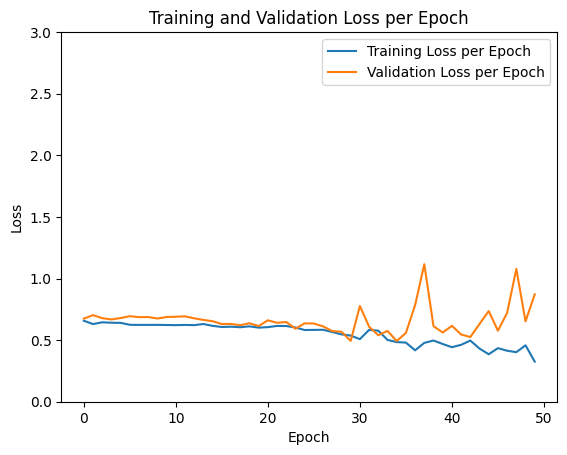

In [11]:
plt.plot(range(0,len(loss_dict['train'])),loss_dict['train'], label = 'Training Loss per Epoch')
plt.plot(range(0,len(loss_dict['validate'])),loss_dict['validate'],  label = 'Validation Loss per Epoch')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0,3)
plt.legend()
plt.show()


## 4.7) Analysis of training using a CNN model(2 points)
Describe your findings. Can your network learn from small subset of random samples? Does CNN model have enough capacity to learn with your choice of emprical hyperparameters?
-  If yes, how will average loss plot will change if you multiply the learning rate by 15?
-  If no, how can you increase the model capacity? Increase your model capacity and train again until you find a model with enough capacity. If the capacity increase is not sufficient to learn, think about empirical parameters you choose in designing your network and make some changes on your selection. Describe what type of changes you made to your original network and how can you manage this model to learn.

We can see that the network isn't learning from a small subset of random samples with our current choice of empirical hyperparameters because the training loss does not converge toward 0 within 50 epochs.  To combat this, I first tried to increase the model capacity by increasing the number of layers; however, that was unsuccessful at significantly reducing the training loss.  Therefore, I tried a few other changes.  First I added weight initialization in the model rather than random weights so that the model could begin training from a better starting point.  This ended up being a very helpful addition in reducing the training loss.  I also read some resources that said batch normalization in the residual unit to stabilize the gradients during training, so I added that into the residual unit as well.  Finally, to limit overfitting with the validation set, I included dropout after the fully connected layer.  We can see from the plot below that the training loss now converges to 0.  The validation loss still isn't great, but better than without any regularization. 

In [4]:
#UPDATED MODEL:

#Residual Unit: 
class ResidualUnit(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ResidualUnit, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.conv1x1 = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, padding=0, bias=False)    
        self.conv1 = nn.Conv2d(out_channels, out_channels, kernel_size=5, stride=1, padding=2, bias=True) 
        
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=5, stride=1, padding=2, bias=True)


        #ADDED: Batch normalization:
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        #ADDED: Weight initialization:
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                
    def forward(self, x):
        if self.in_channels != self.out_channels: #Apply 1x1 convolution if in_channels != out_channels to reshape input
            x = self.conv1x1(x)
        output = self.conv1(x)
        output = self.bn1(output) #ADDED: BatchNorm
        output = self.relu(output)
        output = self.conv2(output)
        output = self.bn2(output) #ADDED: BatchNorm
        output += x
        output = self.relu(output)
        
        return output


#Full CNN Model:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=5, stride=2, padding=2) #Convolutional layer 1    
        self.residual_unit1 = ResidualUnit(8,16) #Residual Unit 1
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=2, padding=2) #Convolutional layer 2        
        self.residual_unit2 = ResidualUnit(32,64) #Residual Unit 2
        self.conv3 = nn.Conv2d(64,64, kernel_size=5, stride=2, padding=2) #Convolutional layer 3        
        self.residual_unit3 = ResidualUnit(64,64) #Residual Unit 3

        self.relu = nn.ReLU() #ReLU activation function
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2) #Max Pooling
        self.fc = nn.Linear(64*16*16, 128)  #Fully connected layer with 128 output units
        self.classification = nn.Linear(128, 2)  #Classification layer for 2 classes for random sample
        
        #ADDED: Dropout
        self.dropout = nn.Dropout(p=0.1)

        #ADDED: Weight initialization
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
        
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.residual_unit1(x)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.residual_unit2(x) 
        
        x = self.conv3(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.residual_unit3(x)

        x = x.view(x.size(0), -1) #Reshape
        x = self.fc(x) #Fully Connected Layer
        x = self.relu(x) #Relu Activation for FC layer
        x = self.dropout(x) #ADDED: Dropout for regularization
        x = self.classification(x) #Classification Layer

        return x
    
    


In [13]:
model = CNNModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

bs = 32

dataset = {'train': ChestXrayDataset('HW2_randomTrainSet.csv','/scratch/yc7087/shared/all_images'), 'validate': ChestXrayDataset('HW2_randomValidationSet.csv','/scratch/yc7087/shared/all_images')}
dataloader = {x: DataLoader(dataset[x], batch_size=bs,
                        shuffle=True, num_workers=0) for x in ['train', 'validate']}

model, acc_dict, loss_dict = train_model(model, dataloader, optimizer, loss_fn=criterion, num_epochs=50, verbose=True)

Epoch: 0/49
----------
Phase:train, epoch loss: 4.9426 Acc: 0.5652
Phase:validate, epoch loss: 0.6776 Acc: 0.6061
Epoch: 1/49
----------
Phase:train, epoch loss: 0.6810 Acc: 0.6000
Phase:validate, epoch loss: 0.6788 Acc: 0.6061
Epoch: 2/49
----------
Phase:train, epoch loss: 0.6291 Acc: 0.6478
Phase:validate, epoch loss: 0.7761 Acc: 0.6061
Epoch: 3/49
----------
Phase:train, epoch loss: 0.5924 Acc: 0.7043
Phase:validate, epoch loss: 0.6447 Acc: 0.6667
Epoch: 4/49
----------
Phase:train, epoch loss: 0.5683 Acc: 0.7217
Phase:validate, epoch loss: 0.6555 Acc: 0.6061
Epoch: 5/49
----------
Phase:train, epoch loss: 0.5567 Acc: 0.7174
Phase:validate, epoch loss: 0.5960 Acc: 0.6667
Epoch: 6/49
----------
Phase:train, epoch loss: 0.5417 Acc: 0.7304
Phase:validate, epoch loss: 0.6286 Acc: 0.6667
Epoch: 7/49
----------
Phase:train, epoch loss: 0.5393 Acc: 0.7130
Phase:validate, epoch loss: 0.5848 Acc: 0.6970
Epoch: 8/49
----------
Phase:train, epoch loss: 0.5288 Acc: 0.7087
Phase:validate, epoch

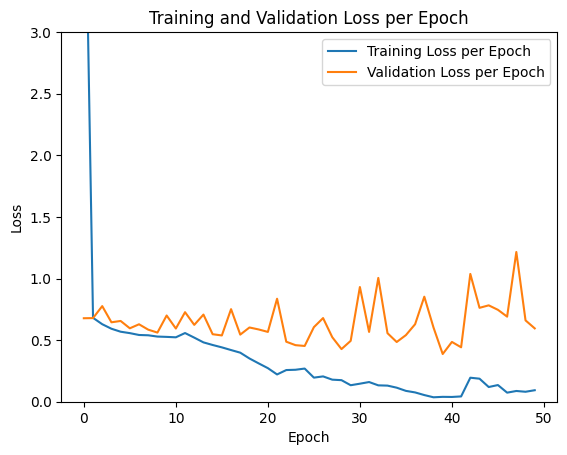

In [15]:
plt.plot(range(0,len(loss_dict['train'])),loss_dict['train'], label = 'Training Loss per Epoch')
plt.plot(range(0,len(loss_dict['validate'])),loss_dict['validate'],  label = 'Validation Loss per Epoch')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0,3)
plt.legend()
plt.show()


## 4.8) Hyperparameters (2.5 points )
Now, we will revisit our selection of CNN model architecture, training parameters and so on: i.e. hyperparameters. In your investigations, define how you will change the hyperparameter in the light of model performance using previous hyperparameters. Provide your rationale choosing the next hyperparameter. Provide learning loss and accuracy curves, and model performance in HW2_randomValidationSet. You will use macro AUC as the performance metric for comparing CNN models for disease classification task.  Report macro AUC for each CNN model with different hyperparameters (Check http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#multiclass-settings).

Investigate the effect of learning rate and batch size in the model performance (try atleast 5 learning rates and 3 batch sizes) and select optimal values for both. You only need to put your best result here.

We can see from the investigation that the model with the highest AUC (0.84) had a batch size of 32 and learning rate of 0.00001. To test this I tested 5 learning rates: 0.1, 0.01, 0.001, 0.0001, and 0.00001 since Adam's default is 0.001 so the model could try values higher and lower.  I also tried batch sizes 16, 32, and 64 as these are standard batch sizes to utilize when training a model.  Iterating through, each model's loss and accuracy are plotted.  We can see that a lower learning rate helps to improve the training loss convergence to 0 and the higher batch sizes stabalized the loss a bit.

In [16]:
#TESTING LR AND BATCH SIZE:
from sklearn.metrics import roc_auc_score

learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]
batch_sizes = [16, 32, 64]

models = []
acc_dicts = []
loss_dicts = []

for l in learning_rates:
    for b in batch_sizes:
        print('Learning Rate:', l)
        print('Batch Size:', b)
        model = CNNModel().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=l) #Increased Learning Rate
        dataset = {'train': ChestXrayDataset('HW2_randomTrainSet.csv','/scratch/yc7087/shared/all_images'), 'validate': ChestXrayDataset('HW2_randomValidationSet.csv','/scratch/yc7087/shared/all_images')}
        dataloader = {x: DataLoader(dataset[x], batch_size=b,
                                shuffle=True, num_workers=0) for x in ['train', 'validate']}

        model, acc_dict, loss_dict = train_model(model, dataloader, optimizer, loss_fn=criterion, num_epochs=50, verbose=True)
        models.append(model)
        acc_dicts.append(acc_dict)
        loss_dicts.append(loss_dict)



Learning Rate: 0.1
Batch Size: 16
Epoch: 0/49
----------
Phase:train, epoch loss: 68718.0108 Acc: 0.4174
Phase:validate, epoch loss: 65.0563 Acc: 0.6061
Epoch: 1/49
----------
Phase:train, epoch loss: 19.1059 Acc: 0.6826
Phase:validate, epoch loss: 0.7828 Acc: 0.6061
Epoch: 2/49
----------
Phase:train, epoch loss: 0.6381 Acc: 0.6870
Phase:validate, epoch loss: 0.6819 Acc: 0.6061
Epoch: 3/49
----------
Phase:train, epoch loss: 0.6252 Acc: 0.6870
Phase:validate, epoch loss: 0.6758 Acc: 0.6061
Epoch: 4/49
----------
Phase:train, epoch loss: 0.6248 Acc: 0.6870
Phase:validate, epoch loss: 0.6900 Acc: 0.6061
Epoch: 5/49
----------
Phase:train, epoch loss: 0.6236 Acc: 0.6870
Phase:validate, epoch loss: 0.6831 Acc: 0.6061
Epoch: 6/49
----------
Phase:train, epoch loss: 0.6243 Acc: 0.6870
Phase:validate, epoch loss: 0.6939 Acc: 0.6061
Epoch: 7/49
----------
Phase:train, epoch loss: 0.6232 Acc: 0.6870
Phase:validate, epoch loss: 0.6822 Acc: 0.6061
Epoch: 8/49
----------
Phase:train, epoch loss: 

In [17]:
import pickle

# Save models
with open('models.pkl', 'wb') as f:
    pickle.dump(models, f)

# Save acc_dicts
with open('acc_dicts.pkl', 'wb') as f:
    pickle.dump(acc_dicts, f)

# Save loss_dicts
with open('loss_dicts.pkl', 'wb') as f:
    pickle.dump(loss_dicts, f)

In [23]:
import pickle

# Load models
with open('models.pkl', 'rb') as f:
    models = pickle.load(f)

# Load acc_dicts
with open('acc_dicts.pkl', 'rb') as f:
    acc_dicts = pickle.load(f)

# Load loss_dicts
with open('loss_dicts.pkl', 'rb') as f:
    loss_dicts = pickle.load(f)

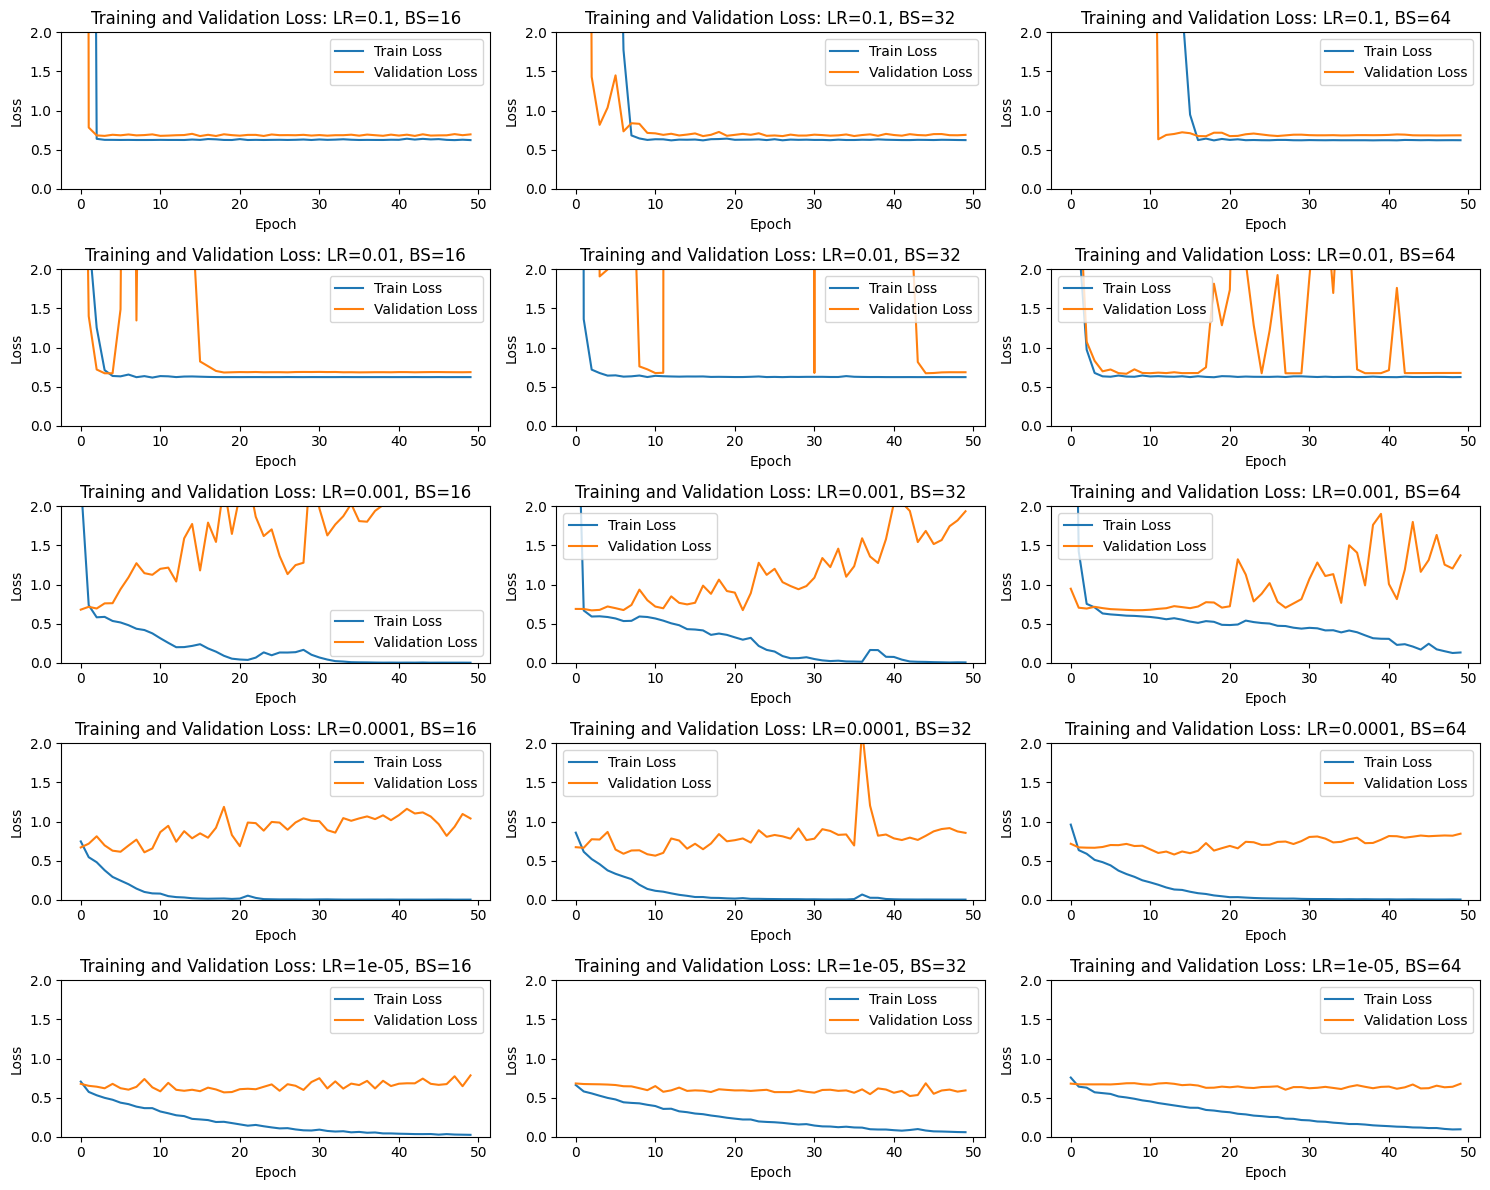

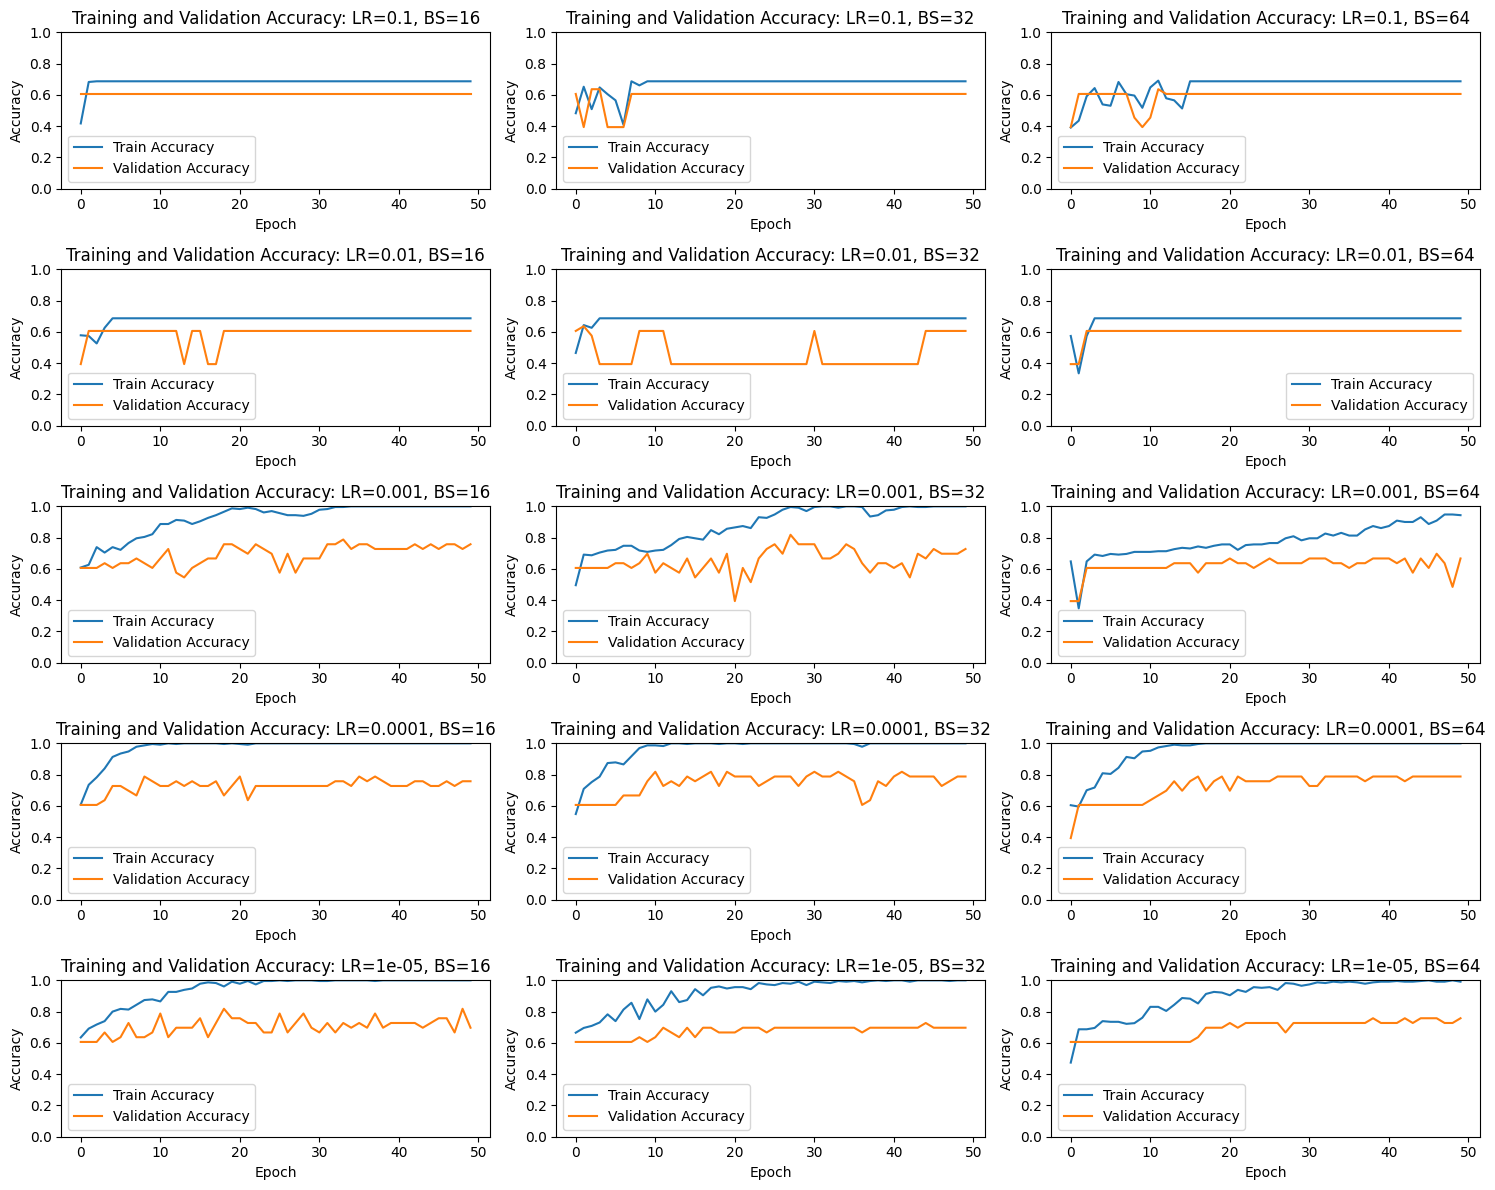

In [24]:
#Plot Loss and Accuracy

learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]
batch_sizes = [16, 32, 64]

#LOSS:
fig, axs = plt.subplots(len(learning_rates), len(batch_sizes), figsize=(15, 12))
idx = 0
for i, lr in enumerate(learning_rates):
    for j, bs in enumerate(batch_sizes):
        loss_dict = loss_dicts[idx]
        model = models[idx]

        axs[i, j].plot(range(0,len(loss_dict['train'])),loss_dict['train'], label='Train Loss')
        axs[i, j].plot(range(0,len(loss_dict['validate'])),loss_dict['validate'], label='Validation Loss')
        axs[i, j].set_title(f'Training and Validation Loss: LR={lr}, BS={bs}')
        axs[i, j].set_xlabel('Epoch')
        axs[i, j].set_ylabel('Loss')
        axs[i,j].set_ylim(0,2)
        axs[i, j].legend()
        idx += 1


plt.tight_layout()
plt.show()

#ACCURACY:
fig, axs = plt.subplots(len(learning_rates), len(batch_sizes), figsize=(15, 12))
idx = 0
for i, lr in enumerate(learning_rates):
    for j, bs in enumerate(batch_sizes):
        acc_dict = acc_dicts[idx]
        model = models[idx]

        axs[i, j].plot(range(0,len(acc_dict['train'])), acc_dict['train'], label='Train Accuracy')
        axs[i, j].plot(range(0,len(acc_dict['train'])), acc_dict['validate'], label='Validation Accuracy')
        axs[i, j].set_title(f'Training and Validation Accuracy: LR={lr}, BS={bs}')
        axs[i, j].set_xlabel('Epoch')
        axs[i, j].set_ylabel('Accuracy')
        axs[i,j].set_ylim(0,1)

        axs[i, j].legend()
        idx += 1


plt.tight_layout()
plt.show()
        

In [31]:
from sklearn.metrics import roc_auc_score

dataset = {'train': ChestXrayDataset('HW2_randomTrainSet.csv','/scratch/yc7087/shared/all_images'), 'validate': ChestXrayDataset('HW2_randomValidationSet.csv','/scratch/yc7087/shared/all_images')}
dataloader = {x: DataLoader(dataset[x], batch_size=bs,
                        shuffle=True, num_workers=0) for x in ['train', 'validate']}

idx = 0
for i, lr in enumerate(learning_rates):
    for j, bs in enumerate(batch_sizes):
        model = models[idx]

        y_true_train, y_pred_train = [], []
        y_true_val, y_pred_val = [], []

        model.eval()
        with torch.no_grad():
            for data in dataloader['train']:
                images, labels = data['image'].to(device), data['label'].to(device)
                outputs = model(images)
                y_true_train.extend(labels.cpu().numpy())
                y_pred_train.extend(torch.softmax(outputs, dim=1)[:, 1].cpu().detach().numpy())  #Probability of positive class

            for data in dataloader['validate']:
                images, labels = data['image'].to(device), data['label'].to(device)
                outputs = model(images)
                y_true_val.extend(labels.cpu().numpy())
                y_pred_val.extend(torch.softmax(outputs, dim=1)[:, 1].cpu().detach().numpy())  #Probability of positive class

            auc_train = roc_auc_score(y_true_train, y_pred_train)
            auc_val = roc_auc_score(y_true_val, y_pred_val)
            idx += 1

            print('Learning Rate:', lr, 'Batch Size:', bs, 'Training AUC:', auc_train, 'Validation AUC:', auc_val)


Learning Rate: 0.1 Batch Size: 16 Training AUC: 0.5 Validation AUC: 0.5
Learning Rate: 0.1 Batch Size: 32 Training AUC: 0.5 Validation AUC: 0.5
Learning Rate: 0.1 Batch Size: 64 Training AUC: 0.5031645569620253 Validation AUC: 0.5
Learning Rate: 0.01 Batch Size: 16 Training AUC: 0.5 Validation AUC: 0.5
Learning Rate: 0.01 Batch Size: 32 Training AUC: 0.5 Validation AUC: 0.5
Learning Rate: 0.01 Batch Size: 64 Training AUC: 0.5 Validation AUC: 0.5
Learning Rate: 0.001 Batch Size: 16 Training AUC: 1.0 Validation AUC: 0.7615384615384615
Learning Rate: 0.001 Batch Size: 32 Training AUC: 1.0 Validation AUC: 0.6423076923076922
Learning Rate: 0.001 Batch Size: 64 Training AUC: 0.9811005625879043 Validation AUC: 0.5346153846153846
Learning Rate: 0.0001 Batch Size: 16 Training AUC: 1.0 Validation AUC: 0.7884615384615384
Learning Rate: 0.0001 Batch Size: 32 Training AUC: 1.0 Validation AUC: 0.8
Learning Rate: 0.0001 Batch Size: 64 Training AUC: 1.0 Validation AUC: 0.8
Learning Rate: 1e-05 Batch S

## 4.9) Train the network on the whole dataset (4 points)
After question 4.7., you should have a network which has enough capacity to learn and you were able to debug your training code so that it is now ready to be trained on the whole dataset. Use the best batch size and learning rate from 4.8. Train your network on the whole train set (HW2_trainSet_new.csv) and check the validation loss on the whole validation set (HW2_validationSet_new.csv) in each epoch. Plot average loss and accuracy on train and validation sets. Describe your findings. Do you see overfitting or underfitting to train set? What else you can do to mitigate it?

Even though the model does not reach 0 training loss, if trained for more epochs it looks like the training loss will approach 0.  However, we can see that the validation loss is increasing, therefore the model is overfitting to the training data.  We could mitigate this by adding additional regularization.  One of example would be to increase the dropout size.  We could also try early stopping for the training as validation increases.  Also we could try to introduce augmented data to help the model generalize better.

In [2]:
#UPDATED to 3 classes:

#Residual Unit: 
class ResidualUnit(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ResidualUnit, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.conv1x1 = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, padding=0, bias=False)    
        self.conv1 = nn.Conv2d(out_channels, out_channels, kernel_size=5, stride=1, padding=2, bias=True) 
        
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=5, stride=1, padding=2, bias=True)


        #ADDED: Batch normalization:
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        #ADDED: Weight initialization:
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                
    def forward(self, x):
        if self.in_channels != self.out_channels: #Apply 1x1 convolution if in_channels != out_channels to reshape input
            x = self.conv1x1(x)
        output = self.conv1(x)
        output = self.bn1(output) #ADDED: BatchNorm
        output = self.relu(output)
        output = self.conv2(output)
        output = self.bn2(output) #ADDED: BatchNorm
        output += x
        output = self.relu(output)
        
        return output


#Full CNN Model:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=5, stride=2, padding=2) #Convolutional layer 1    
        self.residual_unit1 = ResidualUnit(8,16) #Residual Unit 1
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=2, padding=2) #Convolutional layer 2        
        self.residual_unit2 = ResidualUnit(32,64) #Residual Unit 2
        self.conv3 = nn.Conv2d(64,64, kernel_size=5, stride=2, padding=2) #Convolutional layer 3        
        self.residual_unit3 = ResidualUnit(64,64) #Residual Unit 3

        self.relu = nn.ReLU() #ReLU activation function
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2) #Max Pooling
        self.fc = nn.Linear(64*16*16, 128)  #Fully connected layer with 128 output units
        self.classification = nn.Linear(128, 3)  #CHANGED TO 3 CLASSES
        
        #ADDED: Dropout
        self.dropout = nn.Dropout(p=0.1)

        #ADDED: Weight initialization
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
        
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.residual_unit1(x)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.residual_unit2(x) 
        
        x = self.conv3(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.residual_unit3(x)

        x = x.view(x.size(0), -1) #Reshape
        x = self.fc(x) #Fully Connected Layer
        x = self.relu(x) #Relu Activation for FC layer
        x = self.dropout(x) #ADDED: Dropout for regularization
        x = self.classification(x) #Classification Layer

        return x
    
    


In [5]:
def train_model(model, dataloader, optimizer,  loss_fn, num_epochs = 20, verbose = False):
    acc_dict = {'train':[],'validate':[]}
    loss_dict = {'train':[],'validate':[]}
    best_acc = 0
    phases = ['train','validate']
    since = time.time()
    for i in range(num_epochs):
        print('Epoch: {}/{}'.format(i, num_epochs-1))
        print('-'*10)
        for p in phases:
            running_correct = 0
            running_loss = 0
            running_total = 0
            if p == 'train':
                model.train()
            else:
                model.eval()
            for data in dataloader[p]:
                optimizer.zero_grad()            
                image = data['image'].to(device)
                label = data['label'].to(device)
                output = model(image)
                loss = loss_fn(output, label)
                _, preds = torch.max(output, dim = 1)
                num_imgs = image.size()[0]
                running_correct += torch.sum(preds ==label).item()
                running_loss += loss.item()*num_imgs
                running_total += num_imgs
                if p== 'train':
                    loss.backward()
                    optimizer.step()
            epoch_acc = float(running_correct/running_total)
            epoch_loss = float(running_loss/running_total)
            if verbose or (i%10 == 0):
                print('Phase:{}, epoch loss: {:.4f} Acc: {:.4f}'.format(p, epoch_loss, epoch_acc))

            acc_dict[p].append(epoch_acc)
            loss_dict[p].append(epoch_loss)
            if p == 'validate':
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = model.state_dict()
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val acc: {:4f}'.format(best_acc))
    
    model.load_state_dict(best_model_wts)
    
    return model, acc_dict, loss_dict

In [6]:
model_full = CNNModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_full.parameters(), lr=0.00001) 

dataset_full = {'train': ChestXrayDataset('HW2_trainSet_new.csv','/scratch/yc7087/shared/all_images'), 'validate': ChestXrayDataset('HW2_validationSet_new.csv','/scratch/yc7087/shared/all_images')}
dataloader_full = {x: DataLoader(dataset_full[x], batch_size=32,
                        shuffle=True, num_workers=0) for x in ['train', 'validate']}

full_model, full_acc_dict, full_loss_dict = train_model(model_full, dataloader_full, optimizer, loss_fn=criterion, num_epochs=15, verbose=True) #Lowering # of epochs based on graph convergence

Epoch: 0/14
----------
Phase:train, epoch loss: 0.7236 Acc: 0.7415
Phase:validate, epoch loss: 0.6890 Acc: 0.7531
Epoch: 1/14
----------
Phase:train, epoch loss: 0.6728 Acc: 0.7439
Phase:validate, epoch loss: 0.6634 Acc: 0.7524
Epoch: 2/14
----------
Phase:train, epoch loss: 0.6396 Acc: 0.7497
Phase:validate, epoch loss: 0.6510 Acc: 0.7517
Epoch: 3/14
----------
Phase:train, epoch loss: 0.6017 Acc: 0.7576
Phase:validate, epoch loss: 0.6509 Acc: 0.7531
Epoch: 4/14
----------
Phase:train, epoch loss: 0.5674 Acc: 0.7735
Phase:validate, epoch loss: 0.6294 Acc: 0.7546
Epoch: 5/14
----------
Phase:train, epoch loss: 0.5327 Acc: 0.7858
Phase:validate, epoch loss: 0.6283 Acc: 0.7531
Epoch: 6/14
----------
Phase:train, epoch loss: 0.5071 Acc: 0.7973
Phase:validate, epoch loss: 0.6280 Acc: 0.7575
Epoch: 7/14
----------
Phase:train, epoch loss: 0.4769 Acc: 0.8150
Phase:validate, epoch loss: 0.6150 Acc: 0.7678
Epoch: 8/14
----------
Phase:train, epoch loss: 0.4449 Acc: 0.8264
Phase:validate, epoch

In [7]:
import pickle

# Save model
with open('full_model.pkl', 'wb') as f:
    pickle.dump(full_model, f)

# Save acc_dict
with open('full_acc_dict.pkl', 'wb') as f:
    pickle.dump(full_acc_dict, f)

# Save loss_dict
with open('full_loss_dict.pkl', 'wb') as f:
    pickle.dump(full_loss_dict, f)

In [8]:
#Save with torch.save:
torch.save(full_model, 'full_model.pth')

In [5]:
import pickle

# Load models
with open('full_model.pkl', 'rb') as f:
    full_model = pickle.load(f)

# Load acc_dicts
with open('full_acc_dict.pkl', 'rb') as f:
    full_acc_dict = pickle.load(f)

# Load loss_dicts
with open('full_loss_dict.pkl', 'rb') as f:
    full_loss_dict = pickle.load(f)
    

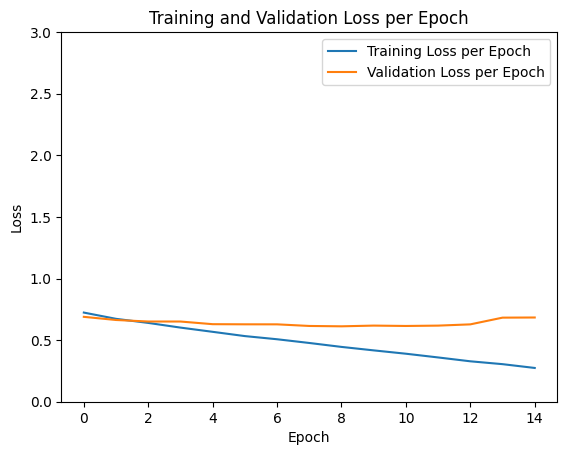

In [6]:
plt.plot(range(0,len(full_loss_dict['train'])),full_loss_dict['train'], label = 'Training Loss per Epoch')
plt.plot(range(0,len(full_loss_dict['validate'])),full_loss_dict['validate'],  label = 'Validation Loss per Epoch')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0,3)
plt.legend()
plt.show()


## 4.10) Experiments with Resnet18

Let's use Resnet18 on our dataset and see how it performs. We can import the standard architectures directly using PyTorch's torchvison.models module. Refer to https://pytorch.org/docs/stable/torchvision/models.html to see all available models in PyTorch. You'll later, in this course, learn about a convenient and useful concept known as Transfer Learning. For now, we will  use the Resnet18 and train the architecture from scratch without any pre-training. Here is the link for the ResNet paper: https://arxiv.org/pdf/1512.03385.pdf 

### 4.10.1) (2 Point)

__What is the reason of using 1x1 convolutions before 3x3 convolutions in the resnet architecture?__

We use 1x1 convolutions before the 3x3 convolution in the resnet architecture to adjust dimensions.  The 1x1 kernel can be used to adjust the total number of feature maps in the input so that the dimensions are compatible with the 3x3 convolution layer.

### 4.10.2) Train the ResNet18 on the whole dataset

We provide a new dataset class and a few additional transformations to the data for this new architecture. We have a new dataset class as ResNet18 architectures expect 3 channels in their primary input and other reasons which you'll later come to know - after the lecture on transfer learning. Nevertheless, for our case, we use them to reduce the required GPU usage as the Resnet18 architecture is significantly complex and GPU memory-intensive architecture than the CNN implemented above.

In [6]:
from torchvision import transforms
# torchvision models are trained on input images normalized to [0 1] range .ToPILImage() function achives this
# additional normalization is required see: http://pytorch.org/docs/master/torchvision/models.html

train_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomResizedCrop(896),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

validation_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.CenterCrop(896),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

class ChestXrayDataset_ResNet(Dataset):
    """Chest X-ray dataset from https://nihcc.app.box.com/v/ChestXray-NIHCC."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file filename information.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.data_frame = load_data_and_get_class(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.data_frame.iloc[idx, 0])
        
        image = io.imread(img_name)
        if len(image.shape) > 2 and image.shape[2] == 4:
            image = image[:,:,0]
            
        image=np.repeat(image[None,...],3,axis=0)
            
        image_class = self.data_frame.iloc[idx, -1]

        if self.transform:
            image = image.T #Added to get the dimensions to work
            image = self.transform(image)
            
        sample = {'x': image, 'y': image_class}

        return sample

def load_data_and_get_class(path_to_data):
    data = pd.read_csv(path_to_data)
    encoder = LabelEncoder()
    data['Class'] = encoder.fit_transform(data['Finding Labels'])
    return data

### 4.10.3) Architecture modification (4.5 points) 
In this question you need to develop a CNN model based on Resnet18 architecture. Please import the original ResNet18 model from PyTorch models (You can also implement this model by your own using the resnet paper). Modify the architecture so that the model will work with full size 1024x1024 image inputs and 3 classes of our interest:
- 0 cardiomegaly
- 1 pneumothorax
- 2 infiltration

Make sure the model you developed uses random weights!

In [10]:
import torchvision.models as models

class ResNet18_CNN(nn.Module):
    def __init__(self):
        super(ResNet18_CNN, self).__init__()
        self.resnet18 = models.resnet18(weights=None) #Original ResNet without pretrained weights
        num_features = self.resnet18.fc.in_features 
        self.resnet18.fc = nn.Linear(num_features, 3) #Modify the last fully connected layer to output 3 classes

    def forward(self, x):
        return self.resnet18(x)




### 4.10.4) Train the network on the whole dataset (4.5 points)
Similar to section 4.7. train the model you developed in section 4.10.2 on the whole train set (HW2_trainSet_new.csv) and check the validation loss on the whole validation set (HW2_validationSet_new.csv) in each epoch. Plot average loss and accuracy on train and validation sets. Describe your findings. Do you see overfitting or underfitting to train set? What else you can do to mitigate it?

We can see from the below plot that the ResNet model is underfitting since the training loss is barely decreasing. We could mitigate this by hyperparameter tuning on the batch size and learning rate like we did for the previous model, since it looks like the learning rate is too small for the model to converge in a reasonable number of epochs.  After that, we could also try using pretrained weights so that the model has a better starting point to train from and potentially increase the number of epochs it is trained on. Finally, we could attempt increasing the capacity of our model by using a deeper version of ResNet and see how that helps decrease the training loss.

In [25]:
def train_model(model, dataloader, optimizer,  loss_fn, num_epochs = 50, verbose = False):
    acc_dict = {'train':[],'validate':[]}
    loss_dict = {'train':[],'validate':[]}
    best_acc = 0
    phases = ['train','validate']
    since = time.time()
    for i in range(num_epochs):
        print('Epoch: {}/{}'.format(i, num_epochs-1))
        print('-'*10)
        for p in phases:
            running_correct = 0
            running_loss = 0
            running_total = 0
            if p == 'train':
                model.train()
            else:
                model.eval()
            for data in dataloader[p]:
                optimizer.zero_grad()            
                image = data['x'].to(device)
                label = data['y'].to(device)
                output = model(image)
                loss = loss_fn(output, label)
                _, preds = torch.max(output, dim = 1)
                num_imgs = image.size()[0]
                running_correct += torch.sum(preds ==label).item()
                running_loss += loss.item()*num_imgs
                running_total += num_imgs
                if p== 'train':
                    loss.backward()
                    optimizer.step()
            epoch_acc = float(running_correct/running_total)
            epoch_loss = float(running_loss/running_total)
            if verbose or (i%10 == 0):
                print('Phase:{}, epoch loss: {:.4f} Acc: {:.4f}'.format(p, epoch_loss, epoch_acc))

            acc_dict[p].append(epoch_acc)
            loss_dict[p].append(epoch_loss)
            if p == 'validate':
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = model.state_dict()
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val acc: {:4f}'.format(best_acc))
    
    model.load_state_dict(best_model_wts)
    
    return model, acc_dict, loss_dict


In [28]:
resnet_model = ResNet18_CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet_model.parameters(), lr=0.00001)

bs = 32

resnet_dataset = {'train': ChestXrayDataset_ResNet('HW2_trainSet_new.csv','/scratch/yc7087/shared/all_images', train_transform), 'validate': ChestXrayDataset_ResNet('HW2_validationSet_new.csv','/scratch/yc7087/shared/all_images', validation_transform)}
resnet_dataloader = {x: DataLoader(resnet_dataset[x], batch_size=bs,
                        shuffle=True, num_workers=0) for x in ['train', 'validate']}

resnet_model, resnet_acc_dict, resnet_loss_dict = train_model(resnet_model, resnet_dataloader, optimizer, loss_fn=criterion, num_epochs=15, verbose=True)

Epoch: 0/14
----------
Phase:train, epoch loss: 0.7398 Acc: 0.7422
Phase:validate, epoch loss: 0.7209 Acc: 0.7524
Epoch: 1/14
----------
Phase:train, epoch loss: 0.7230 Acc: 0.7424
Phase:validate, epoch loss: 0.7122 Acc: 0.7531
Epoch: 2/14
----------
Phase:train, epoch loss: 0.7162 Acc: 0.7422
Phase:validate, epoch loss: 0.7157 Acc: 0.7472
Epoch: 3/14
----------
Phase:train, epoch loss: 0.7139 Acc: 0.7428
Phase:validate, epoch loss: 0.6902 Acc: 0.7531
Epoch: 4/14
----------
Phase:train, epoch loss: 0.7069 Acc: 0.7445
Phase:validate, epoch loss: 0.6998 Acc: 0.7524
Epoch: 5/14
----------
Phase:train, epoch loss: 0.6985 Acc: 0.7471
Phase:validate, epoch loss: 0.6982 Acc: 0.7524
Epoch: 6/14
----------
Phase:train, epoch loss: 0.6933 Acc: 0.7496
Phase:validate, epoch loss: 0.6677 Acc: 0.7700
Epoch: 7/14
----------
Phase:train, epoch loss: 0.6843 Acc: 0.7546
Phase:validate, epoch loss: 0.6692 Acc: 0.7627
Epoch: 8/14
----------
Phase:train, epoch loss: 0.6767 Acc: 0.7597
Phase:validate, epoch

In [29]:
import pickle

# Save model
with open('resnet_model.pkl', 'wb') as f:
    pickle.dump(resnet_model, f)

# Save acc_dict
with open('resnet_acc_dict.pkl', 'wb') as f:
    pickle.dump(resnet_acc_dict, f)

# Save loss_dict
with open('resnet_loss_dict.pkl', 'wb') as f:
    pickle.dump(resnet_loss_dict, f)

In [30]:
#Save with torch.save:
torch.save(resnet_model, 'resnet_model.pth')

In [ ]:
import pickle

# Load models
with open('resnet_model.pkl', 'rb') as f:
    resnet_model = pickle.load(f)

# Load acc_dicts
with open('resnet_acc_dict.pkl', 'rb') as f:
    resnet_acc_dict = pickle.load(f)

# Load loss_dicts
with open('resnet_loss_dict.pkl', 'rb') as f:
    resnet_loss_dict = pickle.load(f)

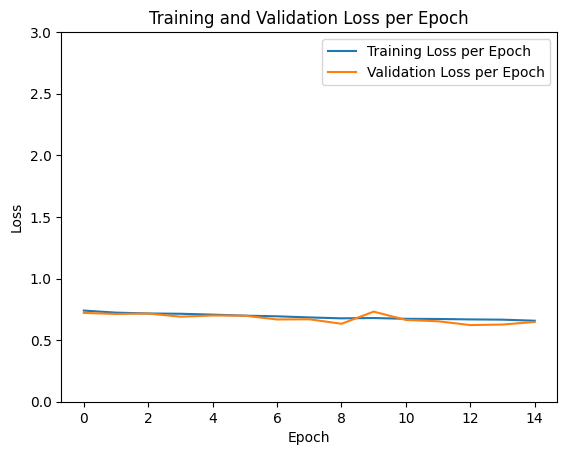

In [32]:
plt.plot(range(0,len(resnet_loss_dict['train'])),resnet_loss_dict['train'], label = 'Training Loss per Epoch')
plt.plot(range(0,len(resnet_loss_dict['validate'])),resnet_loss_dict['validate'],  label = 'Validation Loss per Epoch')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0,3)
plt.legend()
plt.show()


# 5) Analysis of the results from two networks trained on the full dataset (Total 5 points + Bonus Question Maximum 10 points)
Use the validation loss to choose models from Q4.9 (model1) and Q4.10 (model2) (These models are trained on the full dataset and they learned from train data and generalized well to the validation set). 

## 5.1) Model selection by performance on test set (5 Points)
Using these models, plot confusion matrix and ROC curve for the disease classifier on the test set (HW2_TestSet_new.csv). Report AUC for this CNN model as the performance metric. You will have two confusion matrices and two ROC curves to compare model1 and model2

In [13]:
# This is the place we predict the disease from a model trained, output for this function is 
#the target values and probabilty of each image having a disease 

#CNN Predictions:
def get_preds(model, dataloader, phase='test'):
    model.eval()
    all_probs = []  
    true_labels = []
    with torch.no_grad(): 
        for data in dataloader[phase]:
            image = data['image'].to(device)
            label = data['label'].to(device)
            output = model(image)
            all_probs.extend(torch.softmax(output, dim=1).cpu().detach().numpy())
            true_labels.extend(label.cpu().detach().numpy())
    return all_probs, true_labels

bs = 32

CNN_dataset_test = {'test': ChestXrayDataset('HW2_testSet_new.csv','/scratch/yc7087/shared/all_images')}
CNN_dataloader_test = {x: DataLoader(CNN_dataset_test[x], batch_size=bs,
                        shuffle=False, num_workers=0) for x in ['test']}

CNN_model = torch.load('full_model.pth')

CNN_model = CNN_model.to(device)

probs_CNN, true_labels_CNN = get_preds(CNN_model, CNN_dataloader_test, phase = 'test')

#Flip probs and true labels for class 1 & 2 so they match the resnet labels:
probs_CNN = np.array(probs_CNN)
probs_CNN = probs_CNN[:, [0, 2, 1]]
true_labels_CNN = [2 if label == 1 else (1 if label == 2 else label) for label in true_labels_CNN]


In [14]:
#Resnet Predictions:
def get_preds(model, dataloader, phase='test'):
    model.eval()
    all_probs = []  
    true_labels = []
    with torch.no_grad(): 
        for data in dataloader[phase]:
            image = data['x'].to(device)
            label = data['y'].to(device)
            output = model(image)
            all_probs.extend(torch.softmax(output, dim=1).cpu().detach().numpy())
            true_labels.extend(label.cpu().detach().numpy())
    return all_probs, true_labels

bs = 32

resnet_dataset_test = {'test': ChestXrayDataset_ResNet('HW2_testSet_new.csv','/scratch/yc7087/shared/all_images', validation_transform)}
resnet_dataloader_test = {x: DataLoader(resnet_dataset_test[x], batch_size=bs,
                        shuffle=False, num_workers=0) for x in ['test']}

resnet_model = torch.load('resnet_model.pth')

resnet_model = resnet_model.to(device)

probs_resnet, true_labels_resnet = get_preds(resnet_model, resnet_dataloader_test, phase = 'test')

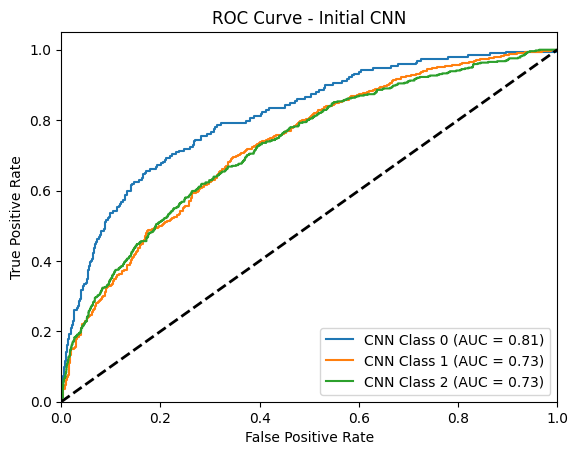

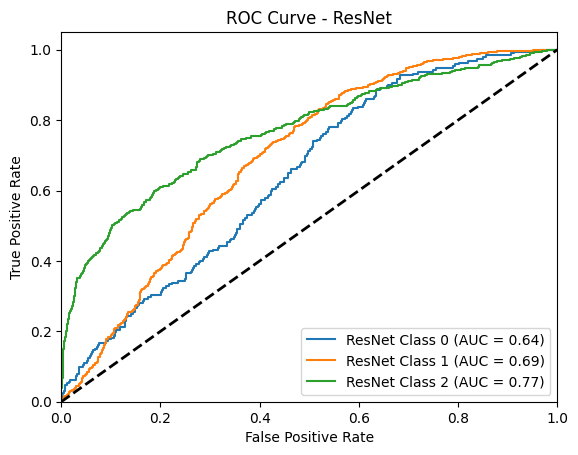

Macro AUC for CNN: 0.756036201024742
Macro AUC for ResNet: 0.7009848925574459


In [20]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score

num_classes = 3

probs_CNN = np.array(probs_CNN)
probs_resnet = np.array(probs_resnet)

one_hot_true_labels_CNN = np.zeros((len(true_labels_CNN), num_classes))
one_hot_true_labels_CNN[np.arange(len(true_labels_CNN)), true_labels_CNN] = 1

one_hot_true_labels_resnet = np.zeros((len(true_labels_resnet), num_classes))
one_hot_true_labels_resnet[np.arange(len(true_labels_resnet)), true_labels_resnet] = 1


# Example of how to plot ROC curves
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

macro_auc_CNN = []
macro_auc_resnet = []

for i in range(num_classes):
    #ROC curve and AUC for CNN model
    fpr_CNN, tpr_CNN, _ = roc_curve(one_hot_true_labels_CNN[:,i], probs_CNN[:, i])
    roc_auc_CNN = auc(fpr_CNN, tpr_CNN)
    macro_auc_CNN.append(roc_auc_CNN)
    plt.plot(fpr_CNN, tpr_CNN, label='CNN Class {} (AUC = {:.2f})'.format(i, roc_auc_CNN))
    
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Initial CNN')
plt.legend(loc="lower right")
plt.show()


for i in range(num_classes):
    #ROC curve and AUC for ResNet model
    fpr_resnet, tpr_resnet, _ = roc_curve(one_hot_true_labels_resnet[:, i], probs_resnet[:, i])
    roc_auc_resnet = auc(fpr_resnet, tpr_resnet)
    macro_auc_resnet.append(roc_auc_resnet)
    plt.plot(fpr_resnet, tpr_resnet, label='ResNet Class {} (AUC = {:.2f})'.format(i, roc_auc_resnet))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ResNet')
plt.legend(loc="lower right")
plt.show()

# Calculate macro AUC
macro_auc_CNN = np.mean(macro_auc_CNN)
macro_auc_resnet = np.mean(macro_auc_resnet)

print("Macro AUC for CNN:", macro_auc_CNN)
print("Macro AUC for ResNet:", macro_auc_resnet)



In [21]:
# Example of how to calculate confusion matrix
# https://www.kaggle.com/grfiv4/plot-a-confusion-matrix

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

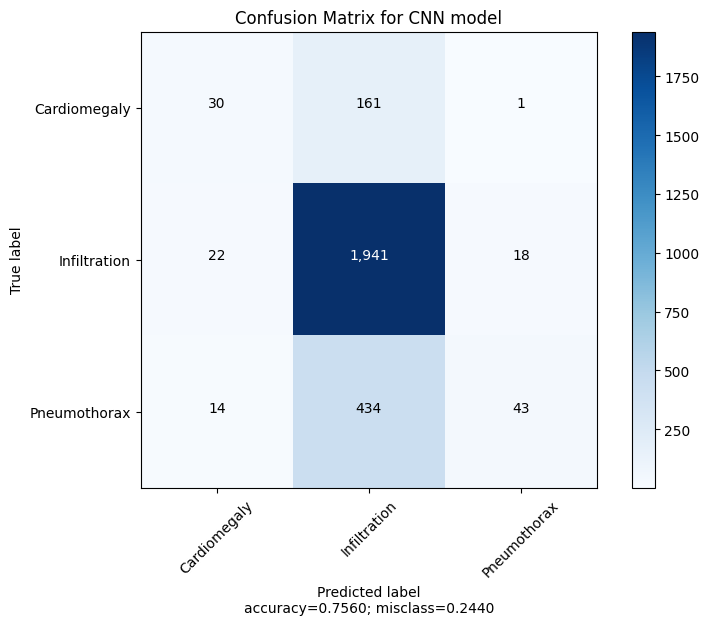

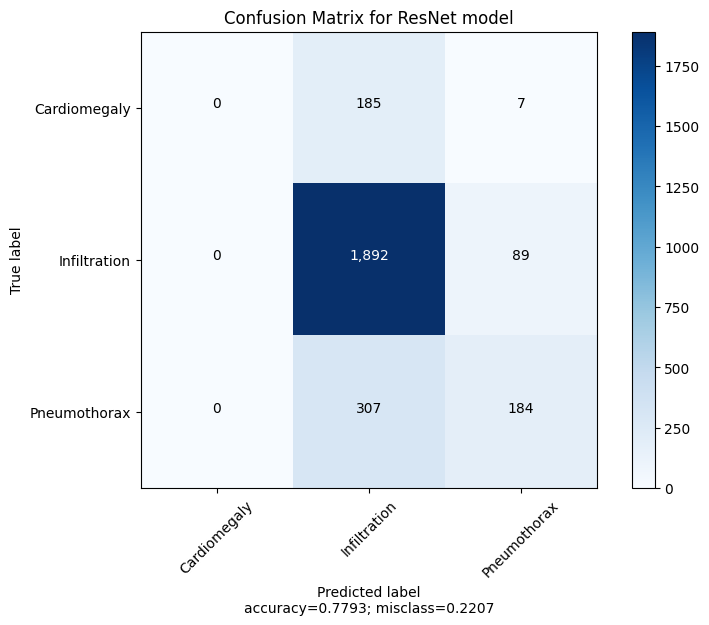

In [27]:
#Confusion matrix for CNN model
conf_matrix_CNN = confusion_matrix(true_labels_CNN, np.argmax(probs_CNN, axis=1) )
plot_confusion_matrix(cm           = conf_matrix_CNN, 
                      normalize    = False,
                      target_names = ['Cardiomegaly', 'Infiltration', 'Pneumothorax'],
                      title        = "Confusion Matrix for CNN model")

#Confusion matrix for ResNet model
conf_matrix_resnet = confusion_matrix(true_labels_resnet, np.argmax(probs_resnet, axis=1))
plot_confusion_matrix(cm           = conf_matrix_resnet, 
                      normalize    = False,
                      target_names = ['Cardiomegaly', 'Infiltration', 'Pneumothorax'],
                      title        = "Confusion Matrix for ResNet model")


## 5.2) Understanding the network ( Bonus Question maximum 10 points)



### 5.2.a Occlusion (5 points)
Using the best performing model (choose the model using the analysis you performed on Q5.1), we will figure out where our network gathers infomation to decide the class for the image. One way of doing this is to occlude parts of the image and run through your network. By changing the location of the ocluded region we can visualize the probability of image being in one class as a 2-dimensional heat map. Using the best performing model, provide the heat map of the following images: HW2_visualize.csv. Do the heap map and bounding box for pathologies provide similar information? Describe your findings.
Reference: https://arxiv.org/pdf/1311.2901.pdf

In [80]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import models
from torchvision import transforms, utils
from PIL import Image, ImageOps, ImageDraw
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import json
import pandas as pd
import os


In [81]:
# You can use the code from: https://github.com/thesemicolonguy/convisualize_nb/blob/master/cnn-visualize.ipynb 
CNN_model = torch.load('full_model.pth')
CNN_model = CNN_model.to(device)

modulelist = list(CNN_model.modules())
labels = [0,1,0,1]

In [82]:
def make_heatmap(image, image_w_bbox, true_class, k=8, stride=8): 
    """
    Input image is of size (1, c, w, h) typically (1, 3, 224, 224) for vgg16
    true_class is a number corresponding to imagenet classes
    k in the filter size (c, k, k)
    """
    heatmap = torch.zeros(int(((image.shape[2]-k)/stride)+1), int(((image.shape[3]-k)/stride)+1))
    image = image.data

    i = 0
    a = 0
    while i<=image.shape[3]-k:
        j = 0 
        b = 0
        while j<=image.shape[2]-k:
            h_filter = torch.ones(image.shape)
            h_filter[:,:,j:j+k, i:i+k] = 0
            temp_image = Variable((image.cuda() * h_filter.cuda()).cuda())
            temp_softmax = CNN_model(temp_image)
            temp_softmax = torch.nn.functional.softmax(temp_softmax).data[0]
            heatmap[a][b] = temp_softmax[true_class]
            j += stride
            b += 1
        # print(a)
        i += stride
        a += 1
    
    image = image.squeeze()
    
    # true_image = image.transpose(0,1)
    # true_image = true_image.transpose(1,2)
    true_image = image
    # Un-Normalize image
    # true_image = true_image * torch.Tensor([0.229, 0.224, 0.225]).cuda()  + torch.Tensor([0.485, 0.456, 0.406]).cuda()
    
    # Plot both images
    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (20, 20)
    
    a = fig.add_subplot(1,2,1)
    imgplot = plt.imshow(image_w_bbox)
    plt.title('Original Image')
    plt.axis('off') 
    
    # Normalize heatmap
    heatmap = heatmap - heatmap.min()
#     heatmap = heatmap/heatmap.max()
    heatmap = np.uint8(255 * heatmap)
    
    a = fig.add_subplot(1,2,2)
    imgplot = plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off') 
    
    return heatmap

In [83]:
def make_bounding_box(csv_file, image_dir):
    df = pd.read_csv(csv_file)

    images = []
    
    for index, row in df.iterrows():
        image_filename = row['Image Index']
        x, y, w, h = row['Bbox [x'], row['y'], row['w'], row['h]']

        image_path = os.path.join(image_dir, image_filename)
        image = Image.open(image_path)

        #Draw bounding box
        draw = ImageDraw.Draw(image)
        draw.rectangle([x, y, x + w, y + h], outline="black", width=2)
        images.append(image)

    return images 
        

In [84]:
#images with bounding boxes
[image_1_w_box, image_2_w_box, image_3_w_box, image_4_w_box] = make_bounding_box('HW2_visualize.csv', '/scratch/yc7087/shared/all_images/')


In [85]:
image_1 = torch.tensor(plt.imread("/scratch/yc7087/shared/all_images/00000661_000.png"))
image_1 = image_1.reshape(1,1,1024,1024)

image_2 = torch.tensor(plt.imread("/scratch/yc7087/shared/all_images/00002176_007.png"))
image_2 = image_2.reshape(1,1,1024,1024)

image_3 = torch.tensor(plt.imread("/scratch/yc7087/shared/all_images/00002435_005.png"))
image_3 = image_3.reshape(1,1,1024,1024)

image_4 = torch.tensor(plt.imread("/scratch/yc7087/shared/all_images/00007471_003.png"))
image_4 = image_4.reshape(1,1,1024,1024)

/state/partition1/job-44644710/ipykernel_1094613/706681861.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  temp_softmax = torch.nn.functional.softmax(temp_softmax).data[0]


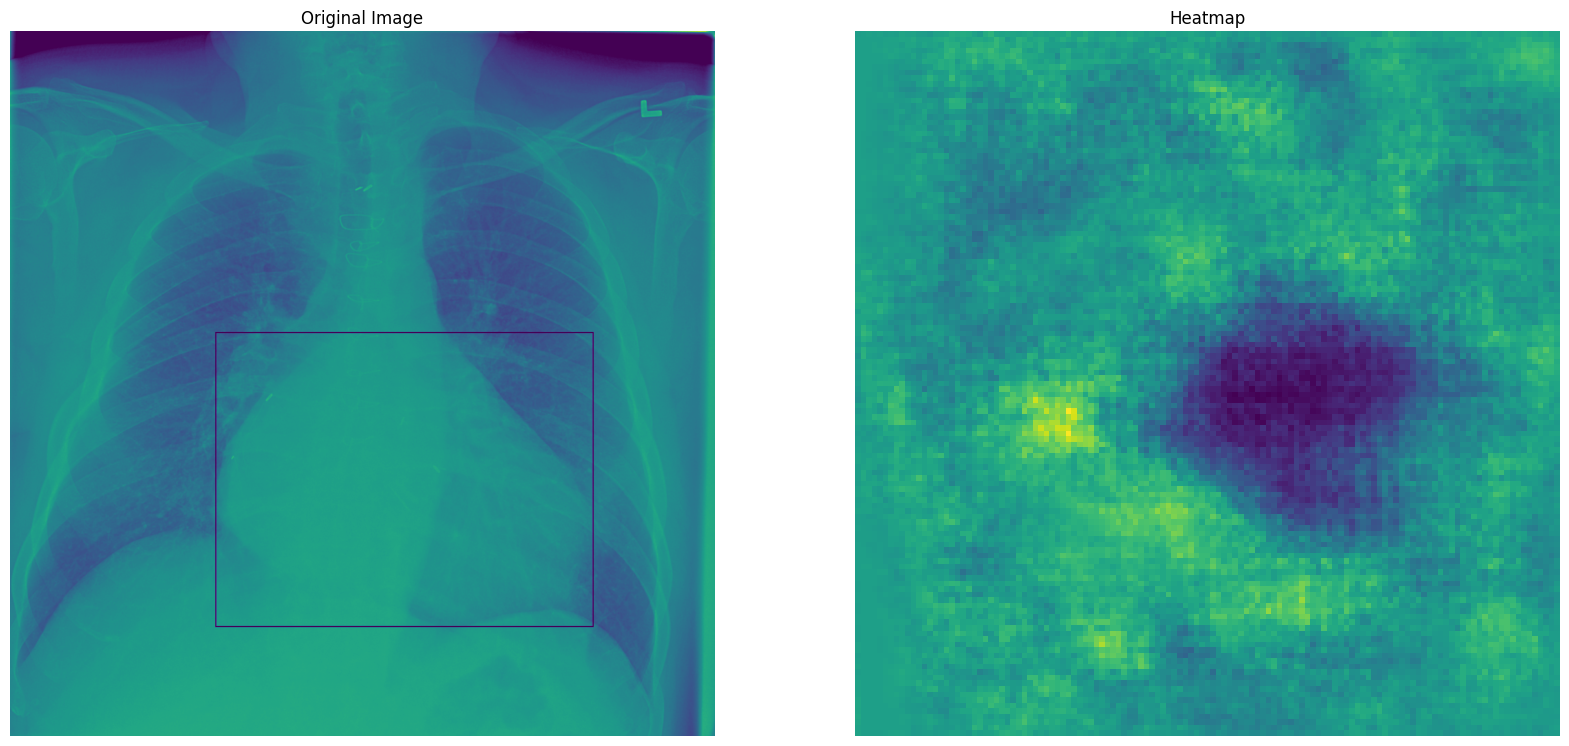

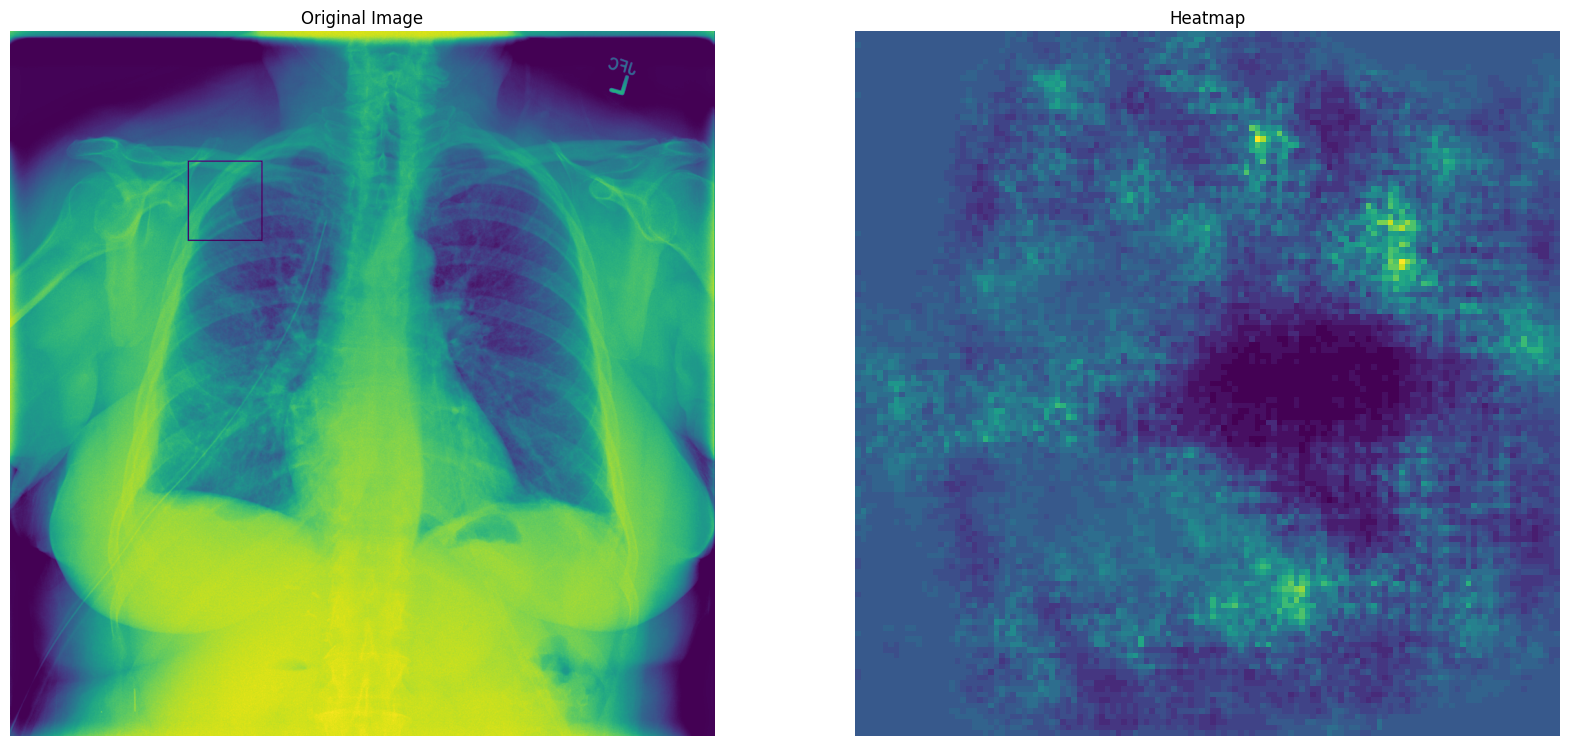

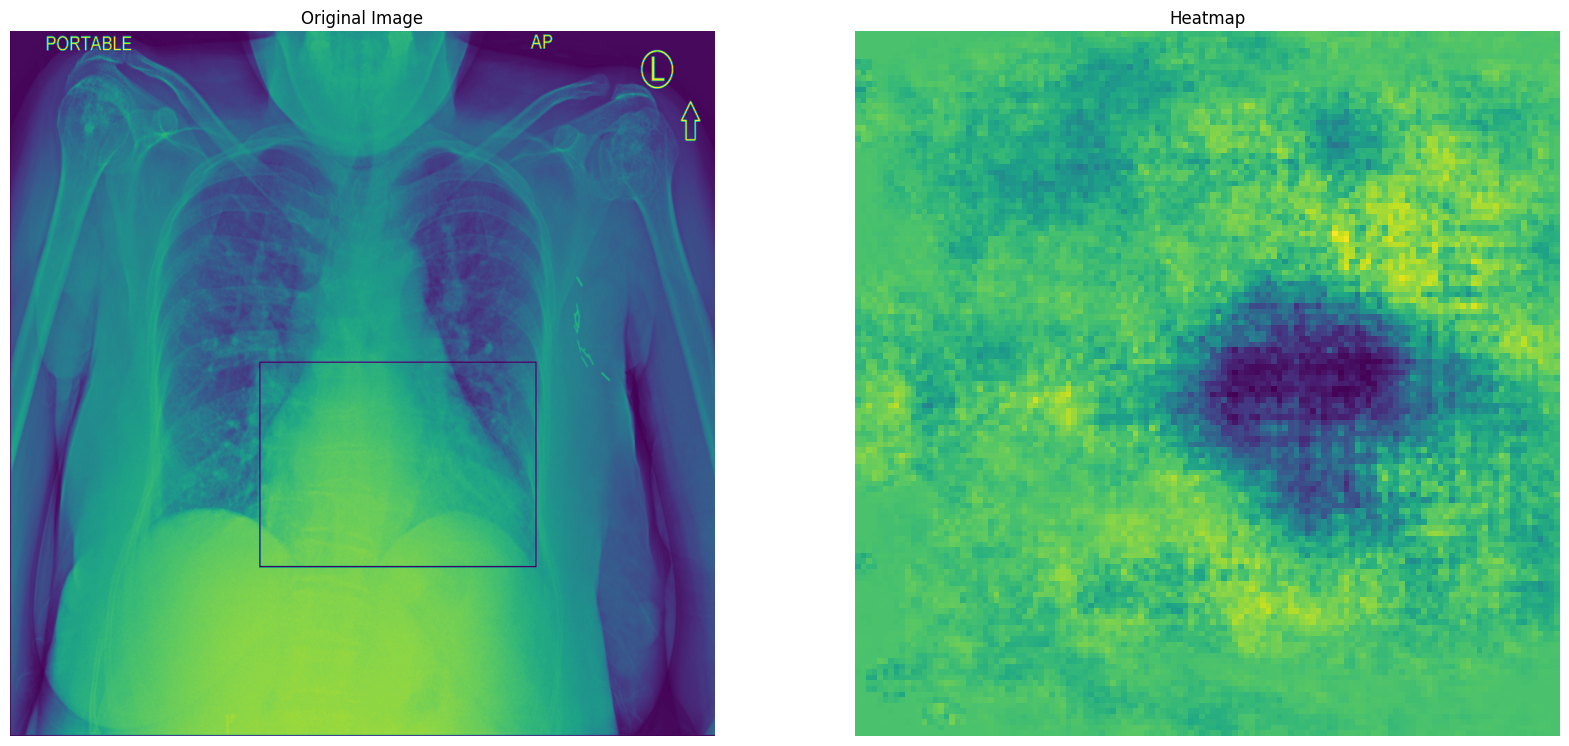

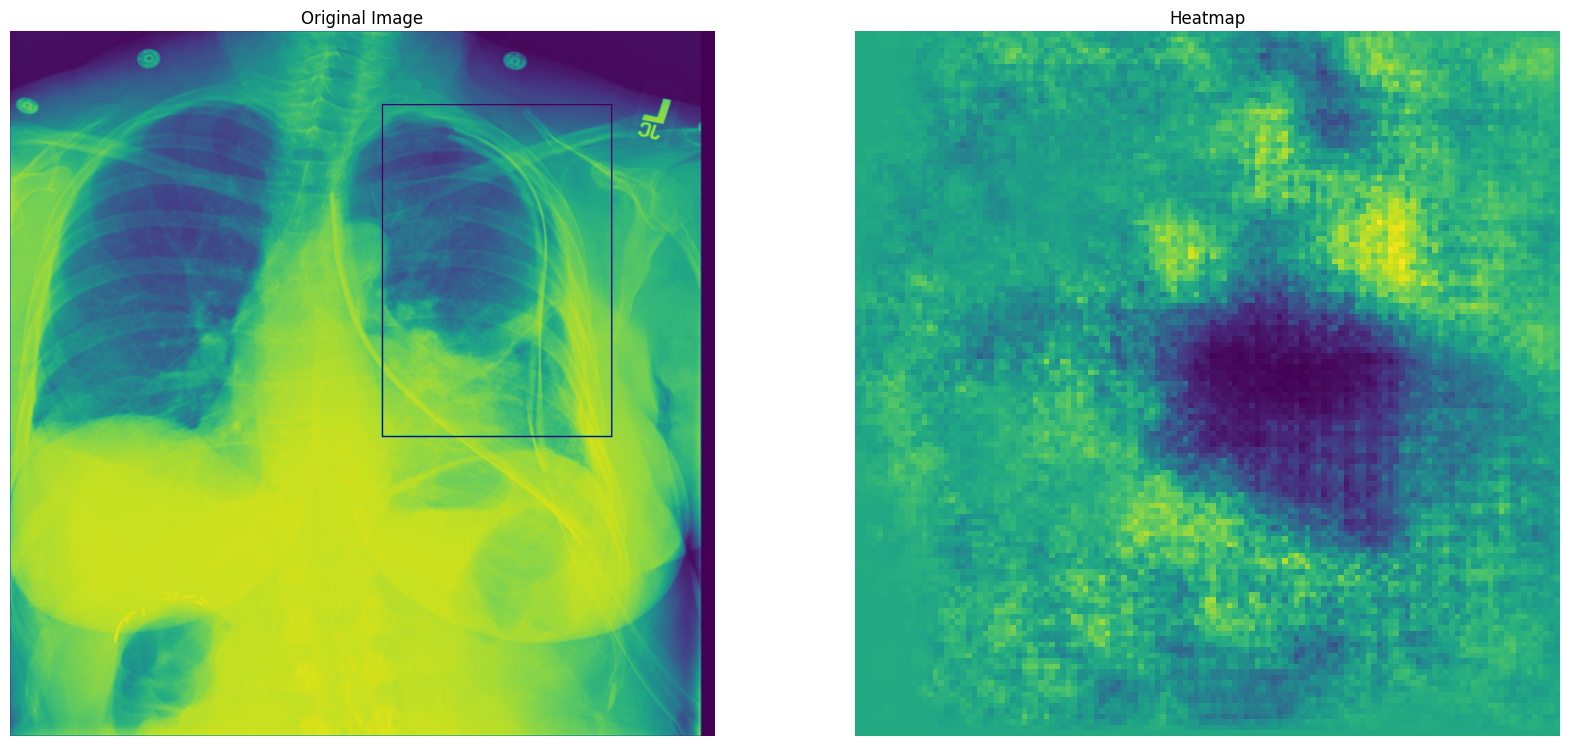

In [87]:
heatmap_1 = make_heatmap(image_1, image_1_w_box, 0, 16, 8)
heatmap_2 = make_heatmap(image_2, image_2_w_box, 0, 16, 8)
heatmap_3 = make_heatmap(image_3, image_3_w_box, 0, 16, 8)
heatmap_4 = make_heatmap(image_4, image_4_w_box, 0, 16, 8)


Using the original CNN model, the heatmaps above were created to show the most salient features in predicting the label.  The first and the third image above depict the cardiomegaly class while the second and fourth image depict the pneumothorax.  We can see from the location of the bounding boxes that the model is using more relevant features to predict caromegaly than pneumothorax since those bounding boxes align well with the salient features.  This makes sense since the CNN model's AUC was better for cardomegaly than pneumothorax.

### 5.2.b GradCAM (5 points)
An alternative approach to model interpretation is gradcam. Go through https://arxiv.org/pdf/1610.02391.pdf and create heatmaps of images in HW2_visualize.csv using this method. Repeat the analysis in 5.2.a and also compare the time-taken to generate occlusions and gradcams